In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.exceptions import ConvergenceWarning

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.layers import GRU
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import time

data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Select the cancer type column as the target variable (e.g., 'Bladder')
target = data['Bladder'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 15  # Number of years for training
test_size = 5  # Number of years for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Split into input and output variables
X_train = train_data[:-1]
y_train = train_data[1:]
X_test = test_data[:-1]
y_test = test_data[1:]


C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
model = LinearRegression()  # Choose the desired machine learning model
start_time = time.time()
model.fit(X_train, y_train.ravel())
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
training_time = time.time() - start_time

model_name = model.__class__.__name__
print(f"{model_name} RMSE: {rmse}")
print(f"{model_name} MAE: {mae}")
print(f"{model_name} R-squared: {r2}")
print(f"{model_name} Training Time: {training_time}")
print()


LinearRegression RMSE: 0.16947225912860753
LinearRegression MAE: 0.15966585122919902
LinearRegression R-squared: -1.8732813633576475
LinearRegression Training Time: 0.007949352264404297



In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression, SVR
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, GRU
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import time

# Set a random seed for reproducibility
np.random.seed(42)

# Load and preprocess the new dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Normalize the target variable
    scaler = MinMaxScaler(feature_range=(0, 1))
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Define the regression models to be evaluated
    models = [
        LinearRegression(),
        SVR(),
        AdaBoostRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor()
    ]

    print(f"Predicting {cancer_type}:")

    # Train and evaluate each model
    for model in models:
        start_time = time.time()
        model.fit(X_train, y_train.ravel())
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        training_time = time.time() - start_time

        model_name = model.__class__.__name__
        print(f"{model_name} RMSE: {rmse}")
        print(f"{model_name} MAE: {mae}")
        print(f"{model_name} R-squared: {r2}")
        print(f"{model_name} Training Time: {training_time}")
        print()

    # Define the deep learning models to be evaluated
    deep_learning_models = [
        (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "LSTM"),
        (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1), return_sequences=True), LSTM(32), Dense(1)]), "Stacked LSTM"),
        (Sequential([Bidirectional(LSTM(32), input_shape=(X_train.shape[1], 1)), Dense(1)]), "Bidirectional LSTM"),
        (Sequential([GRU(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "GRU")
    ]

    # Train and evaluate each deep learning model
    for model, model_name in deep_learning_models:
        start_time = time.time()
        model.compile(loss='mse', optimizer='adam')
        model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=1, verbose=0)
        predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        training_time = time.time() - start_time

        print(f"{model_name} RMSE: {rmse}")
        print(f"{model_name} MAE: {mae}")
        print(f"{model_name} R-squared: {r2}")
        print(f"{model_name} Training Time: {training_time}")
        print()

    # Exponential Smoothing
    start_time = time.time()
    ets_model = ExponentialSmoothing(y_train.ravel())
    ets_fit = ets_model.fit()
    ets_predictions = ets_fit.forecast(len(y_test))
    ets_mse = mean_squared_error(y_test, ets_predictions)
    ets_rmse = np.sqrt(ets_mse)
    ets_mae = mean_absolute_error(y_test, ets_predictions)
    ets_r2 = r2_score(y_test, ets_predictions)
    ets_training_time = time.time() - start_time
    print(f"ETS RMSE: {ets_rmse}")
    print(f"ETS MAE: {ets_mae}")
    print(f"ETS R-squared: {ets_r2}")
    print(f"ETS Training Time: {ets_training_time}")
    print()


Predicting Bladder:
LinearRegression RMSE: 0.16947225912860753
LinearRegression MAE: 0.15966585122919902
LinearRegression R-squared: -1.8732813633576475
LinearRegression Training Time: 0.0039904117584228516

SVR RMSE: 0.3216301118166203
SVR MAE: 0.28612671502200715
SVR R-squared: -9.348903129751639
SVR Training Time: 0.00884556770324707

AdaBoostRegressor RMSE: 0.43547046659940075
AdaBoostRegressor MAE: 0.3698979591836734
AdaBoostRegressor R-squared: -17.971354166666668
AdaBoostRegressor Training Time: 0.0788869857788086

RandomForestRegressor RMSE: 0.3024082380929263
RandomForestRegressor MAE: 0.2595615889212828
RandomForestRegressor R-squared: -8.14888469424957
RandomForestRegressor Training Time: 0.0953226089477539

GradientBoostingRegressor RMSE: 0.4371912272933369
GradientBoostingRegressor MAE: 0.374490586481636
GradientBoostingRegressor R-squared: -18.121580929276355
GradientBoostingRegressor Training Time: 0.04388236999511719

1/1 [==============================] - 1s 628ms/step

C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


1/1 [==============================] - 0s 348ms/step
LSTM RMSE: 0.2482893275104567
LSTM MAE: 0.22746674880637963
LSTM R-squared: -10.48335846590639
LSTM Training Time: 2.072601556777954

1/1 [==============================] - 1s 923ms/step
Stacked LSTM RMSE: 0.2654353305988053
Stacked LSTM MAE: 0.24738690421237786
Stacked LSTM R-squared: -12.1241224976839
Stacked LSTM Training Time: 3.5988848209381104

1/1 [==============================] - 1s 604ms/step
Bidirectional LSTM RMSE: 0.25972955229978023
Bidirectional LSTM MAE: 0.2374896349038108
Bidirectional LSTM R-squared: -11.565956485139047
Bidirectional LSTM Training Time: 4.079809904098511

1/1 [==============================] - 0s 275ms/step
GRU RMSE: 0.2521428716679364
GRU MAE: 0.22746743425979454
GRU R-squared: -10.842576724463461
GRU Training Time: 1.838843822479248

ETS RMSE: 0.2524128008966311
ETS MAE: 0.24154459928554528
ETS R-squared: -10.867946219591436
ETS Training Time: 0.007200002670288086

Predicting Breast:
LinearRegress

C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


GradientBoostingRegressor RMSE: 0.3047163816201429
GradientBoostingRegressor MAE: 0.2747989842562621
GradientBoostingRegressor R-squared: -2.078697099221743
GradientBoostingRegressor Training Time: 0.04526782035827637

1/1 [==============================] - 0s 297ms/step
LSTM RMSE: 0.32676236565541794
LSTM MAE: 0.2827772010527356
LSTM R-squared: -2.5402947443670967
LSTM Training Time: 1.8919551372528076

1/1 [==============================] - 1s 1s/step
Stacked LSTM RMSE: 0.2709179490417981
Stacked LSTM MAE: 0.24518398534877142
Stacked LSTM R-squared: -1.4336096318635527
Stacked LSTM Training Time: 4.544005632400513

1/1 [==============================] - 1s 555ms/step
Bidirectional LSTM RMSE: 0.2809301918795407
Bidirectional LSTM MAE: 0.25271029364688236
Bidirectional LSTM R-squared: -1.61680998883379
Bidirectional LSTM Training Time: 3.0097687244415283

1/1 [==============================] - 0s 284ms/step
GRU RMSE: 0.2642882131912325
GRU MAE: 0.23807590794188818
GRU R-squared: -1.315

C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


1/1 [==============================] - 0s 340ms/step
LSTM RMSE: 0.32691425562488424
LSTM MAE: 0.2583077012196831
LSTM R-squared: -5.0709562685399705
LSTM Training Time: 1.976273536682129

1/1 [==============================] - 1s 559ms/step
Stacked LSTM RMSE: 0.3888009213497415
Stacked LSTM MAE: 0.3298311738864235
Stacked LSTM R-squared: -7.587049316298925
Stacked LSTM Training Time: 3.7800557613372803

1/1 [==============================] - 1s 831ms/step
Bidirectional LSTM RMSE: 0.37234288044553654
Bidirectional LSTM MAE: 0.3052783815757088
Bidirectional LSTM R-squared: -6.87545210278394
Bidirectional LSTM Training Time: 3.905560255050659

1/1 [==============================] - 1s 595ms/step
GRU RMSE: 0.433294176410711
GRU MAE: 0.3956608085528664
GRU R-squared: -9.664858320724813
GRU Training Time: 2.637321949005127

ETS RMSE: 0.8259439190677996
ETS MAE: 0.8152173867692116
ETS R-squared: -37.75167743231625
ETS Training Time: 0.010881423950195312

Predicting Colorectal:
LinearRegressio

C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


GradientBoostingRegressor RMSE: 0.2520682015103552
GradientBoostingRegressor MAE: 0.2020693193996579
GradientBoostingRegressor R-squared: -2.6021757726865222
GradientBoostingRegressor Training Time: 0.03962564468383789

1/1 [==============================] - 0s 326ms/step
LSTM RMSE: 0.17380985620891876
LSTM MAE: 0.14940275649229687
LSTM R-squared: -0.7126853230758121
LSTM Training Time: 2.3834335803985596

1/1 [==============================] - 1s 937ms/step
Stacked LSTM RMSE: 0.20330618136591616
Stacked LSTM MAE: 0.1604711850484212
Stacked LSTM R-squared: -1.3433110578539669
Stacked LSTM Training Time: 4.029567241668701

1/1 [==============================] - 1s 534ms/step
Bidirectional LSTM RMSE: 0.20217541560885888
Bidirectional LSTM MAE: 0.16489110042651492
Bidirectional LSTM R-squared: -1.3173170903277698
Bidirectional LSTM Training Time: 3.0406501293182373

1/1 [==============================] - 1s 614ms/step
GRU RMSE: 0.21707085966747025
GRU MAE: 0.17190229793389636
GRU R-square

C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


RandomForestRegressor RMSE: 0.2915866407508398
RandomForestRegressor MAE: 0.25546511627907
RandomForestRegressor R-squared: -1.357369821930651
RandomForestRegressor Training Time: 0.2088005542755127

GradientBoostingRegressor RMSE: 0.39192102067296264
GradientBoostingRegressor MAE: 0.3519409762922208
GradientBoostingRegressor R-squared: -3.258822985378485
GradientBoostingRegressor Training Time: 0.08640313148498535

1/1 [==============================] - 1s 573ms/step
LSTM RMSE: 0.24934294098488316
LSTM MAE: 0.21072395665701044
LSTM R-squared: -0.7237990208496972
LSTM Training Time: 2.1332571506500244

1/1 [==============================] - 1s 548ms/step
Stacked LSTM RMSE: 0.2564565591161874
Stacked LSTM MAE: 0.22218623999939408
Stacked LSTM R-squared: -0.8235601642535431
Stacked LSTM Training Time: 3.7054359912872314

1/1 [==============================] - 1s 567ms/step
Bidirectional LSTM RMSE: 0.24844007304912663
Bidirectional LSTM MAE: 0.21102612985427988
Bidirectional LSTM R-square

C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


GradientBoostingRegressor RMSE: 0.3604797112630523
GradientBoostingRegressor MAE: 0.2501660481359147
GradientBoostingRegressor R-squared: -0.7111781354712294
GradientBoostingRegressor Training Time: 0.08631443977355957

1/1 [==============================] - 0s 346ms/step
LSTM RMSE: 0.2973547953295715
LSTM MAE: 0.21709391539511474
LSTM R-squared: -0.16434977226243275
LSTM Training Time: 1.8684120178222656

1/1 [==============================] - 1s 628ms/step
Stacked LSTM RMSE: 0.30976268743232205
Stacked LSTM MAE: 0.1971408507746199
Stacked LSTM R-squared: -0.26354809218839725
Stacked LSTM Training Time: 3.5241637229919434

1/1 [==============================] - 1s 646ms/step
Bidirectional LSTM RMSE: 0.31489907943290546
Bidirectional LSTM MAE: 0.20316066657719406
Bidirectional LSTM R-squared: -0.3057990594277389
Bidirectional LSTM Training Time: 3.820990800857544

1/1 [==============================] - 0s 336ms/step
GRU RMSE: 0.3107620274032509
GRU MAE: 0.18963697617468628
GRU R-square

C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


RandomForestRegressor RMSE: 0.3975791213069018
RandomForestRegressor MAE: 0.38295689655172477
RandomForestRegressor R-squared: -5.484690810975629
RandomForestRegressor Training Time: 0.1356351375579834

GradientBoostingRegressor RMSE: 0.39399948362133735
GradientBoostingRegressor MAE: 0.3839873062495382
GradientBoostingRegressor R-squared: -5.368445550826998
GradientBoostingRegressor Training Time: 0.04767799377441406

1/1 [==============================] - 1s 675ms/step
LSTM RMSE: 0.2870876606905282
LSTM MAE: 0.254638376934775
LSTM R-squared: -2.381202549188245
LSTM Training Time: 2.554262638092041

1/1 [==============================] - 1s 680ms/step
Stacked LSTM RMSE: 0.36344544091532344
Stacked LSTM MAE: 0.3396663249566637
Stacked LSTM R-squared: -4.419017899859246
Stacked LSTM Training Time: 3.8643405437469482

1/1 [==============================] - 1s 529ms/step
Bidirectional LSTM RMSE: 0.3530633577170265
Bidirectional LSTM MAE: 0.32849143753791676
Bidirectional LSTM R-squared: -

C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression, SVR
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, GRU
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import time
import psutil

# Set a random seed for reproducibility
np.random.seed(42)

# Load and preprocess the new dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Normalize the target variable
    scaler = MinMaxScaler(feature_range=(0, 1))
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Define the regression models to be evaluated
    models = [
        LinearRegression(),
        SVR(),
        AdaBoostRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor()
    ]

    print(f"Predicting {cancer_type}:")

    for model in models:
        start_time = time.time()
        model.fit(X_train, y_train.ravel())
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        training_time = time.time() - start_time

        cpu_percent = psutil.cpu_percent(interval=1)
        memory_info = psutil.virtual_memory()

        model_name = model.__class__.__name__
        print(f"{model_name} RMSE: {rmse}")
        print(f"{model_name} MAE: {mae}")
        print(f"{model_name} R-squared: {r2}")
        print(f"{model_name} Training Time: {training_time} seconds")
        print(f"{model_name} CPU Usage: {cpu_percent}%")
        print(f"{model_name} Memory Usage: {memory_info.used / (1024 ** 2)} MB")
        print()

    deep_learning_models = [
        (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "LSTM"),
        (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1), return_sequences=True), LSTM(32), Dense(1)]), "Stacked LSTM"),
        (Sequential([Bidirectional(LSTM(32), input_shape=(X_train.shape[1], 1)), Dense(1)]), "Bidirectional LSTM"),
        (Sequential([GRU(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "GRU")
    ]

    for model, model_name in deep_learning_models:
        start_time = time.time()
        model.compile(loss='mse', optimizer='adam')
        model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=1, verbose=0)
        predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        training_time = time.time() - start_time

        cpu_percent = psutil.cpu_percent(interval=1)
        memory_info = psutil.virtual_memory()

        print(f"{model_name} RMSE: {rmse}")
        print(f"{model_name} MAE: {mae}")
        print(f"{model_name} R-squared: {r2}")
        print(f"{model_name} Training Time: {training_time} seconds")
        print(f"{model_name} CPU Usage: {cpu_percent}%")
        print(f"{model_name} Memory Usage: {memory_info.used / (1024 ** 2)} MB")
        print()


Predicting Bladder:
LinearRegression RMSE: 0.16947225912860753
LinearRegression MAE: 0.15966585122919902
LinearRegression R-squared: -1.8732813633576475
LinearRegression Training Time: 0.0020275115966796875 seconds
LinearRegression CPU Usage: 9.3%
LinearRegression Memory Usage: 22606.58984375 MB

SVR RMSE: 0.3216301118166203
SVR MAE: 0.28612671502200715
SVR R-squared: -9.348903129751639
SVR Training Time: 0.003786802291870117 seconds
SVR CPU Usage: 10.3%
SVR Memory Usage: 22610.00390625 MB

AdaBoostRegressor RMSE: 0.43547046659940075
AdaBoostRegressor MAE: 0.3698979591836734
AdaBoostRegressor R-squared: -17.971354166666668
AdaBoostRegressor Training Time: 0.06923389434814453 seconds
AdaBoostRegressor CPU Usage: 13.0%
AdaBoostRegressor Memory Usage: 22608.1171875 MB

RandomForestRegressor RMSE: 0.3024082380929263
RandomForestRegressor MAE: 0.2595615889212828
RandomForestRegressor R-squared: -8.14888469424957
RandomForestRegressor Training Time: 0.10622835159301758 seconds
RandomForestRe

RandomForestRegressor RMSE: 0.31244830927248424
RandomForestRegressor MAE: 0.3108369565217394
RandomForestRegressor R-squared: -4.545564286353477
RandomForestRegressor Training Time: 0.10668015480041504 seconds
RandomForestRegressor CPU Usage: 7.5%
RandomForestRegressor Memory Usage: 22700.6328125 MB

GradientBoostingRegressor RMSE: 0.3461121245363705
GradientBoostingRegressor MAE: 0.3371097914651529
GradientBoostingRegressor R-squared: -5.804919823390212
GradientBoostingRegressor Training Time: 0.06240415573120117 seconds
GradientBoostingRegressor CPU Usage: 8.3%
GradientBoostingRegressor Memory Usage: 22702.42578125 MB

1/1 [==============================] - 0s 372ms/step
LSTM RMSE: 0.3211020834531553
LSTM MAE: 0.2574757097855858
LSTM R-squared: -4.857005518487978
LSTM Training Time: 2.752793550491333 seconds
LSTM CPU Usage: 20.4%
LSTM Memory Usage: 22746.30078125 MB

1/1 [==============================] - 1s 748ms/step
Stacked LSTM RMSE: 0.38779277651667693
Stacked LSTM MAE: 0.32860

1/1 [==============================] - 0s 359ms/step
LSTM RMSE: 0.2912021604535692
LSTM MAE: 0.2253289527219275
LSTM R-squared: -0.11666461612123147
LSTM Training Time: 2.7452712059020996 seconds
LSTM CPU Usage: 11.2%
LSTM Memory Usage: 22130.55078125 MB

1/1 [==============================] - 1s 550ms/step
Stacked LSTM RMSE: 0.321771322497811
Stacked LSTM MAE: 0.18638353859600815
Stacked LSTM R-squared: -0.36341554200476955
Stacked LSTM Training Time: 3.9166882038116455 seconds
Stacked LSTM CPU Usage: 14.7%
Stacked LSTM Memory Usage: 22137.05078125 MB

1/1 [==============================] - 1s 594ms/step
Bidirectional LSTM RMSE: 0.3096398675547298
Bidirectional LSTM MAE: 0.20996884321388992
Bidirectional LSTM R-squared: -0.26254630557959513
Bidirectional LSTM Training Time: 4.925710201263428 seconds
Bidirectional LSTM CPU Usage: 13.1%
Bidirectional LSTM Memory Usage: 22108.36328125 MB

1/1 [==============================] - 0s 312ms/step
GRU RMSE: 0.3110450828517876
GRU MAE: 0.1932340

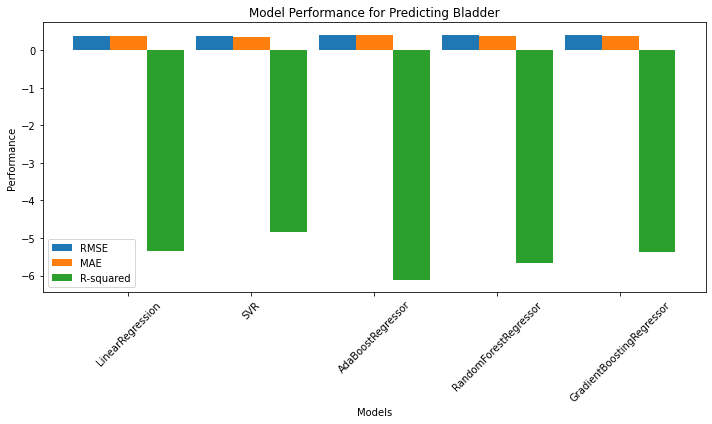

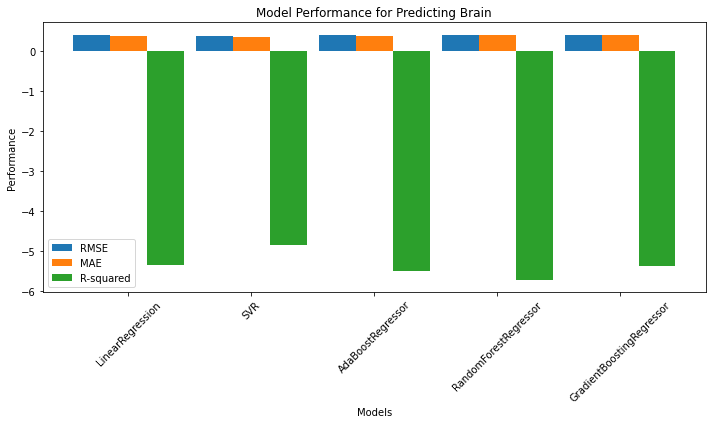

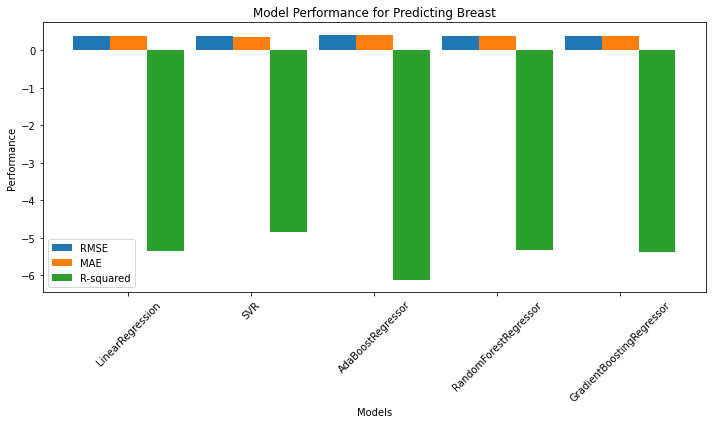

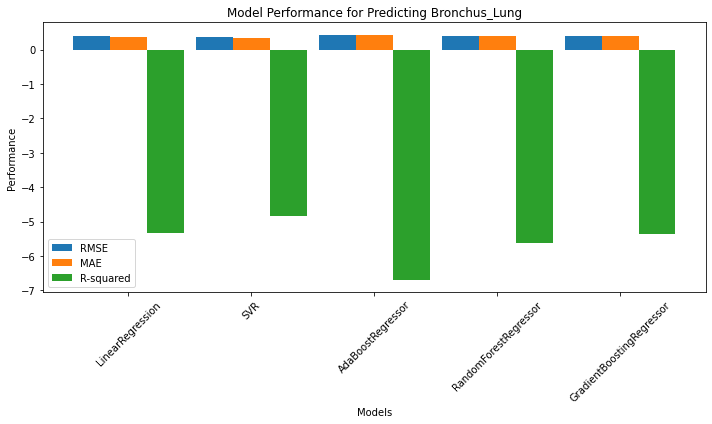

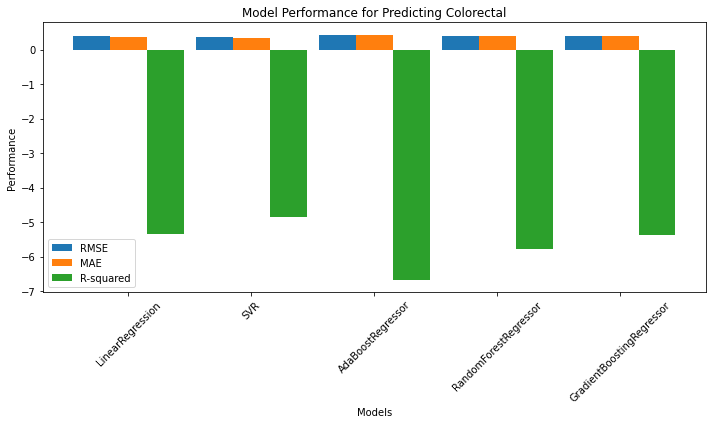

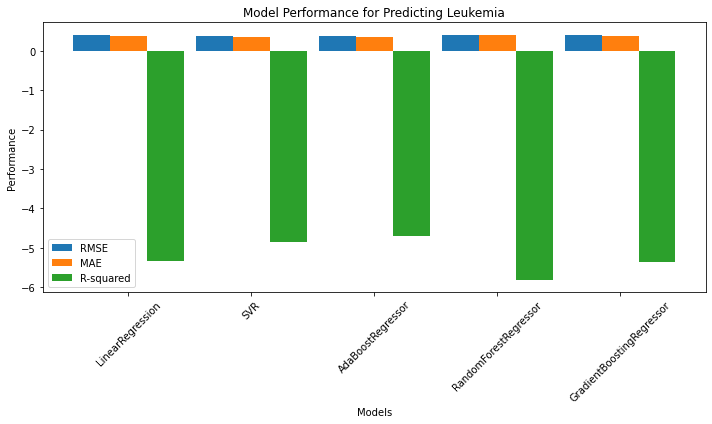

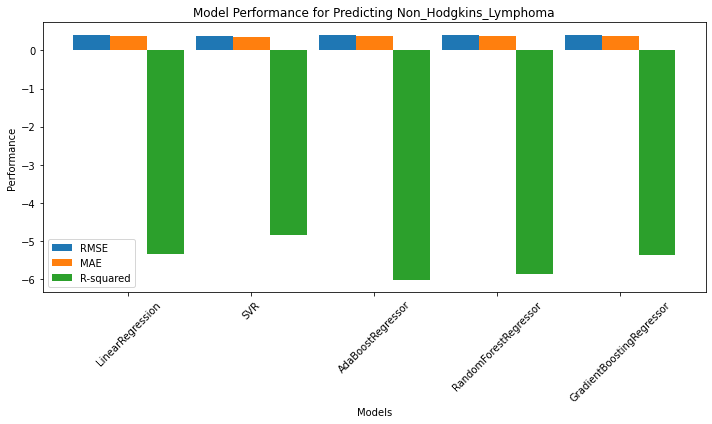

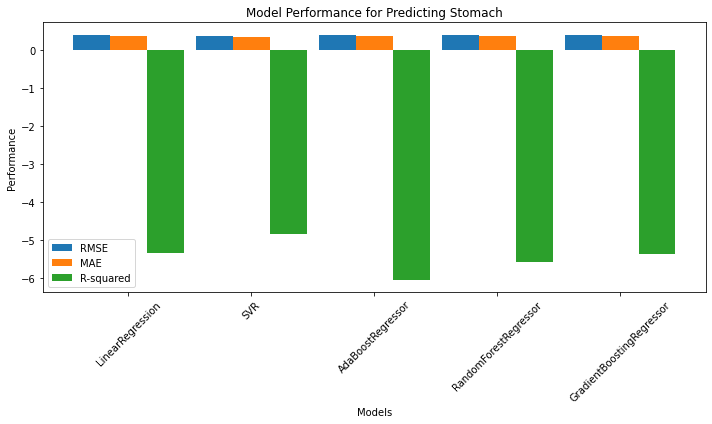

In [13]:
import matplotlib.pyplot as plt

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

for cancer_type in cancer_columns:
    model_names = []  # To store model names
    rmse_values = []  # To store RMSE values
    mae_values = []   # To store MAE values
    r2_values = []    # To store R-squared values

    for model in models:
        model_names.append(model.__class__.__name__)
        model.fit(X_train, y_train.ravel())
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        rmse_values.append(rmse)
        mae_values.append(mae)
        r2_values.append(r2)

    # Create a bar plot to visualize model performance
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(model_names))
    width = 0.3
    ax.bar(x - width, rmse_values, width, label='RMSE')
    ax.bar(x, mae_values, width, label='MAE')
    ax.bar(x + width, r2_values, width, label='R-squared')

    ax.set_xlabel('Models')
    ax.set_ylabel('Performance')
    ax.set_title(f'Model Performance for Predicting {cancer_type}')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=45)
    ax.legend()

    plt.tight_layout()
    plt.show()


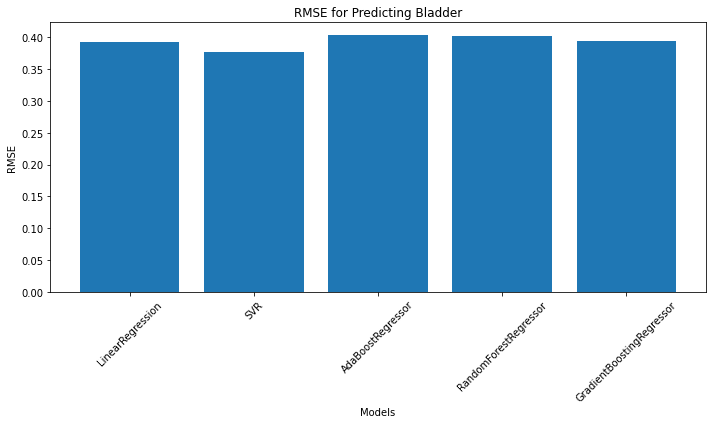

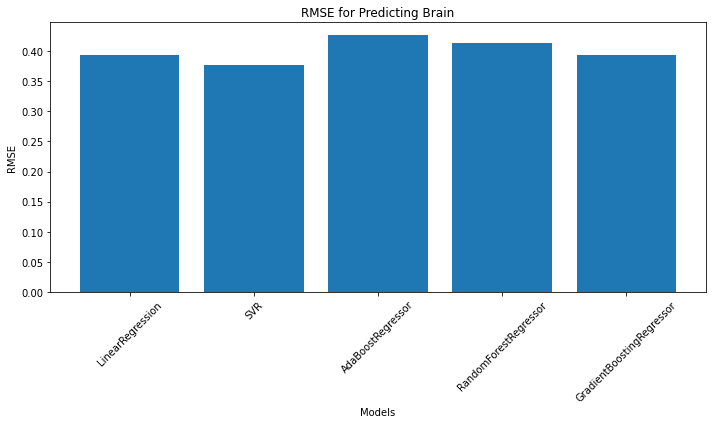

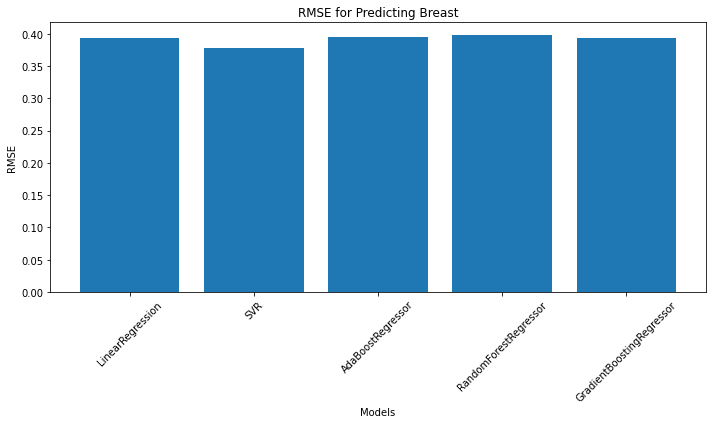

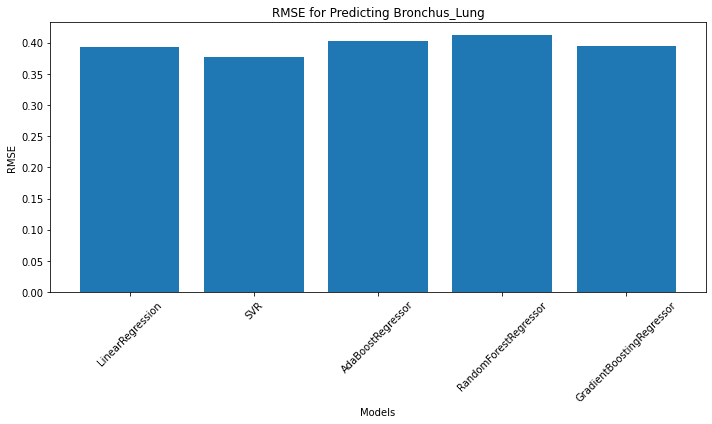

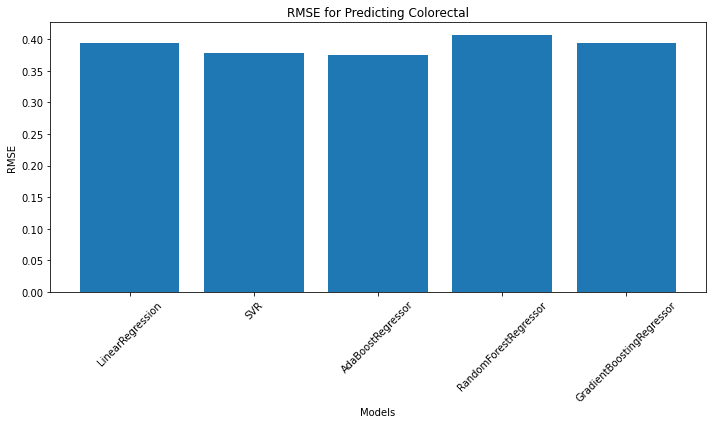

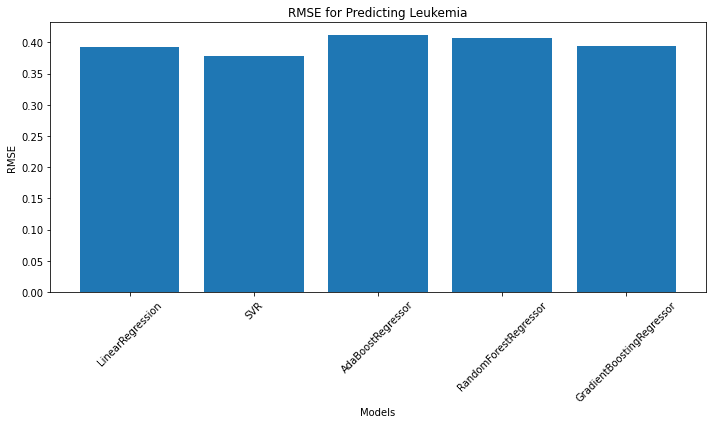

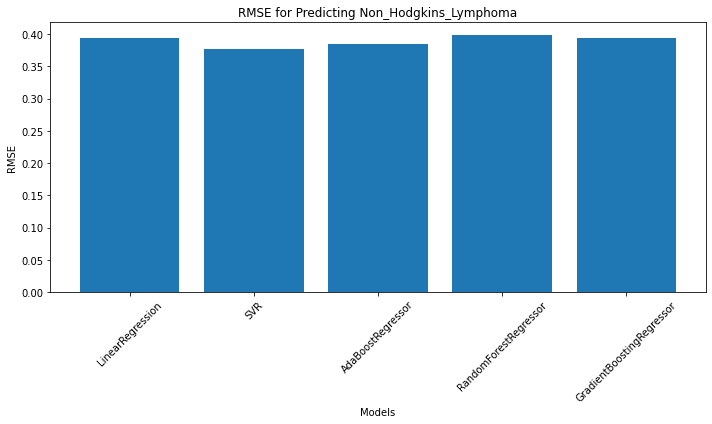

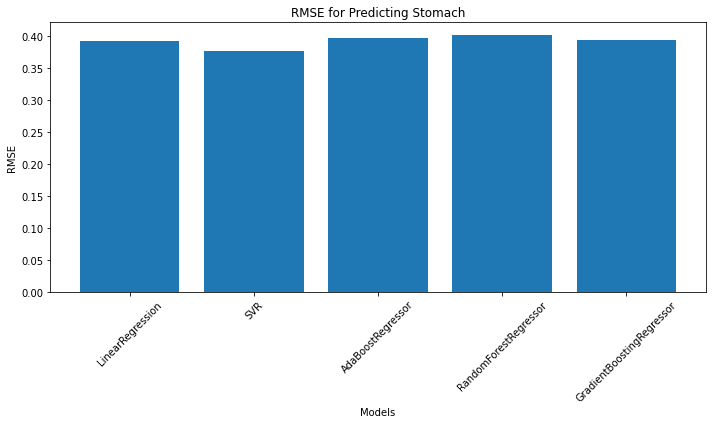

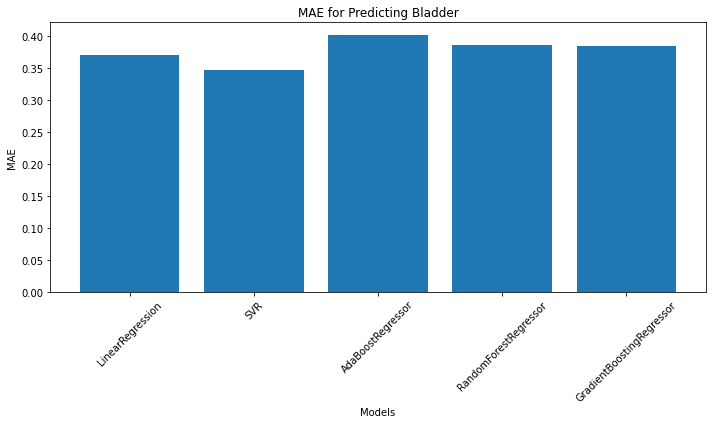

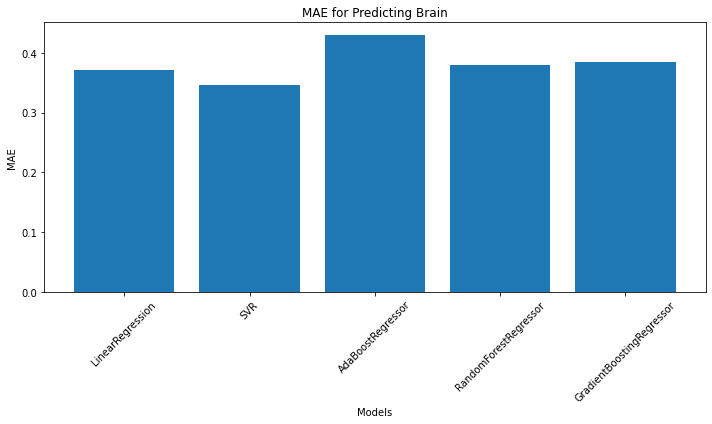

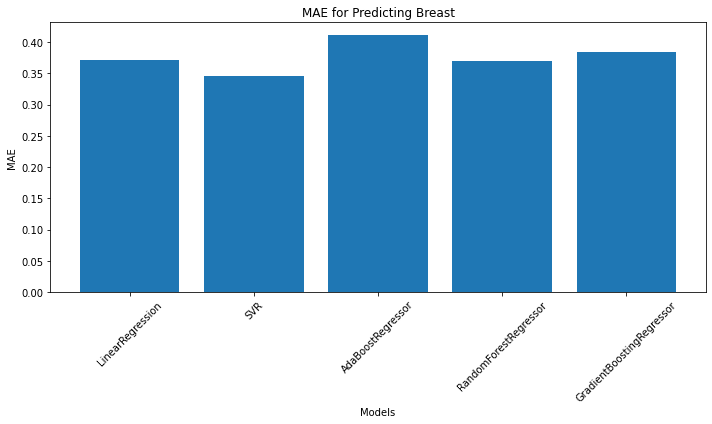

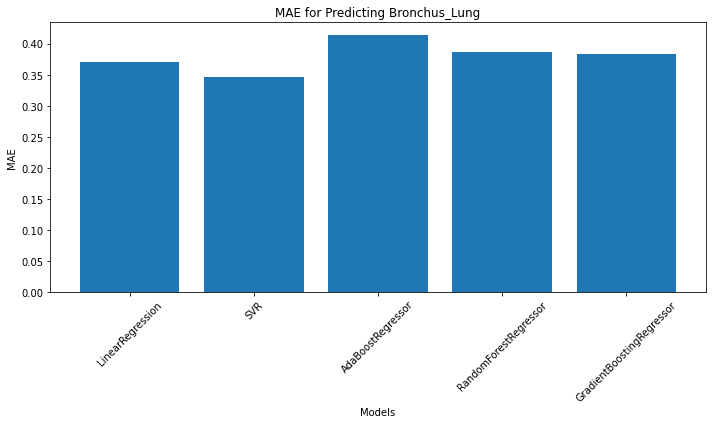

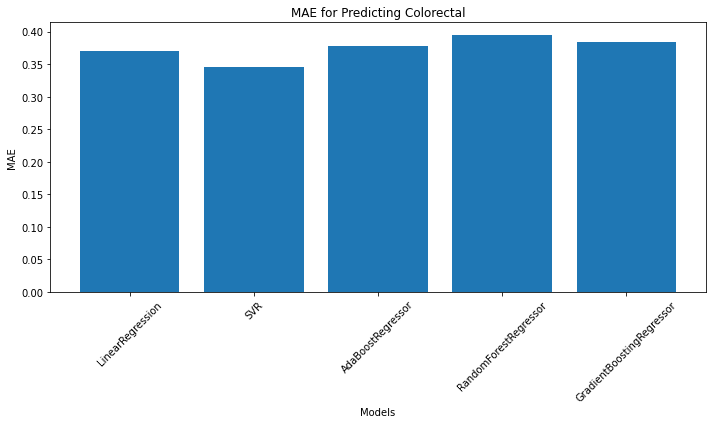

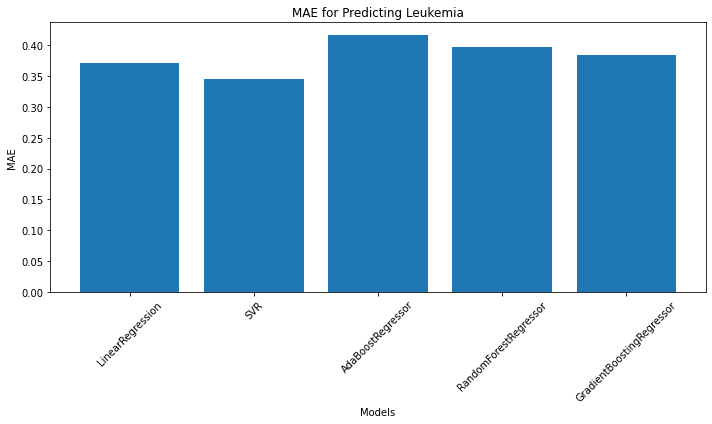

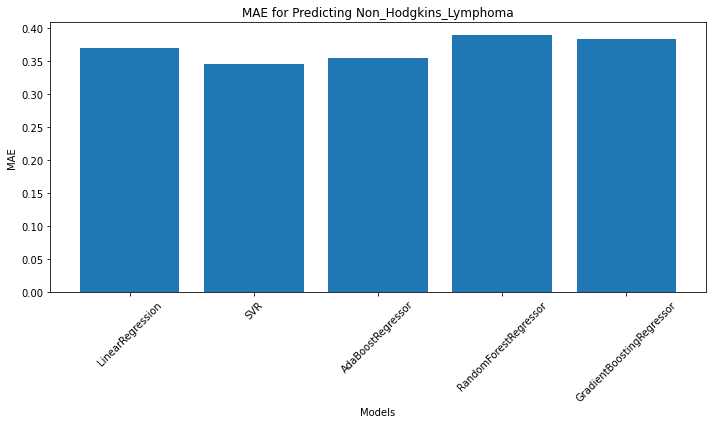

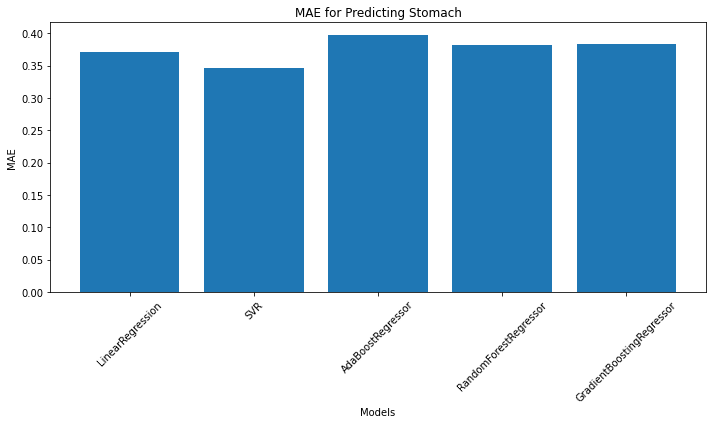

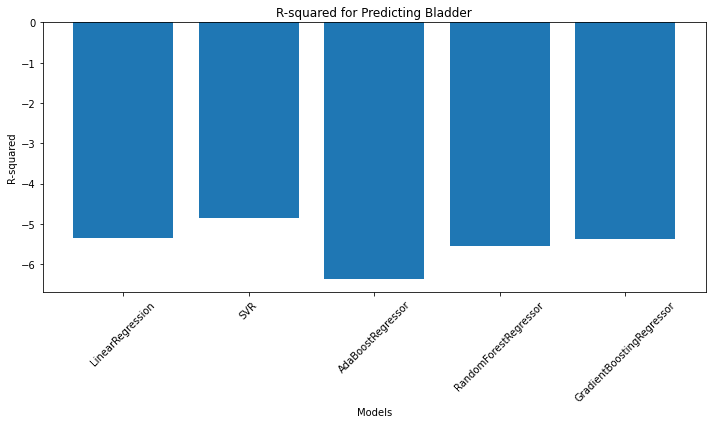

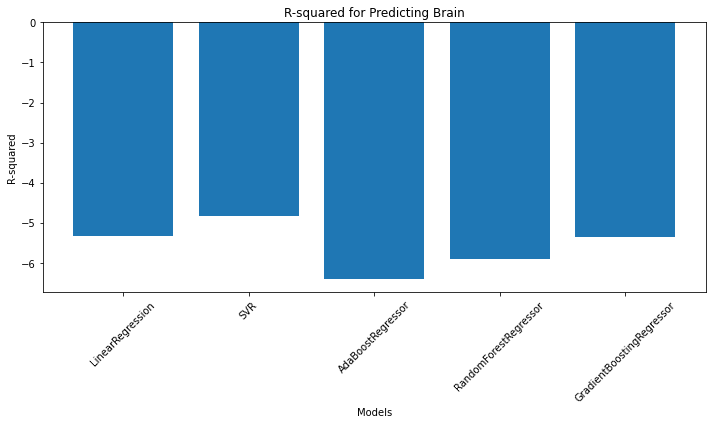

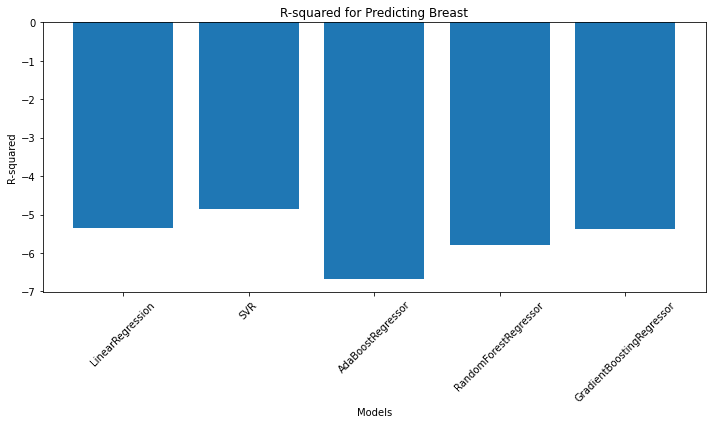

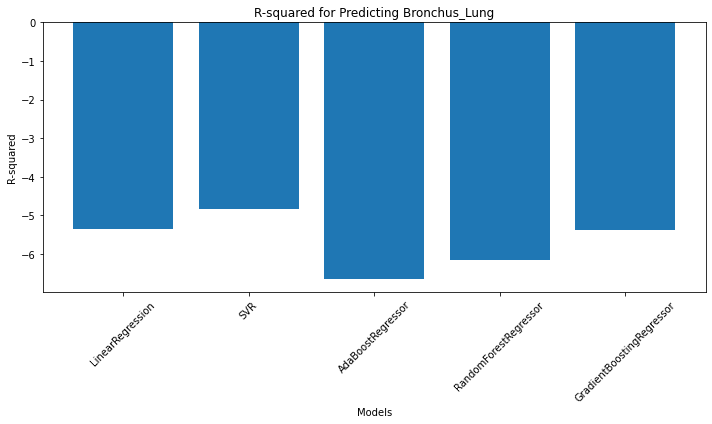

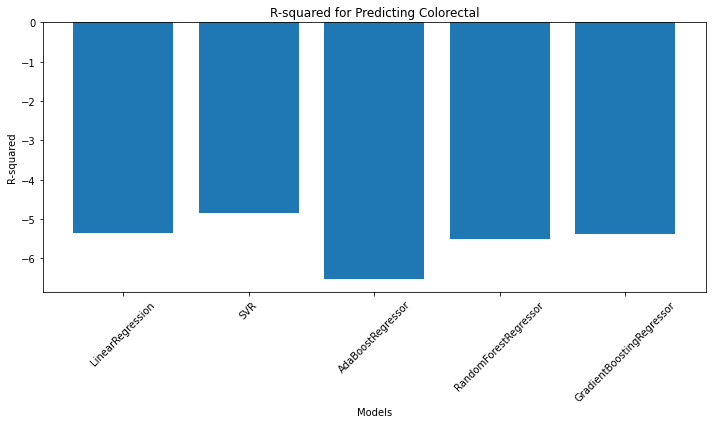

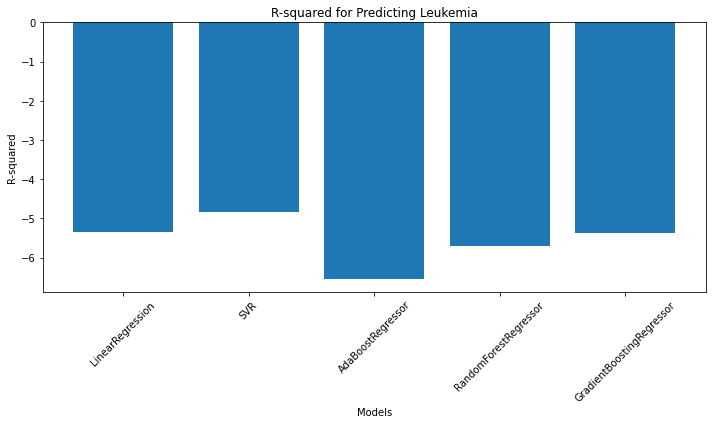

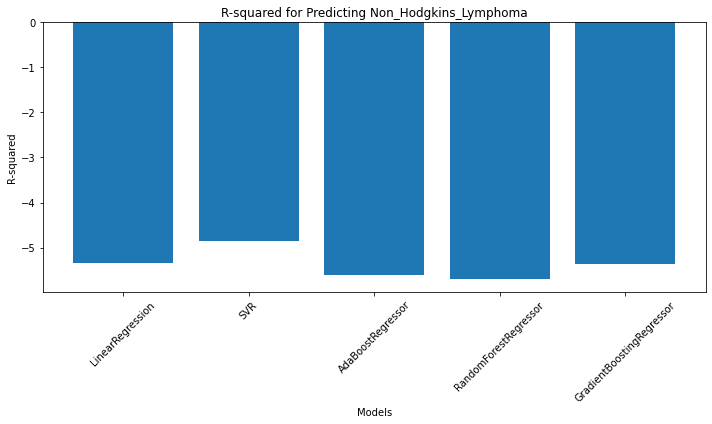

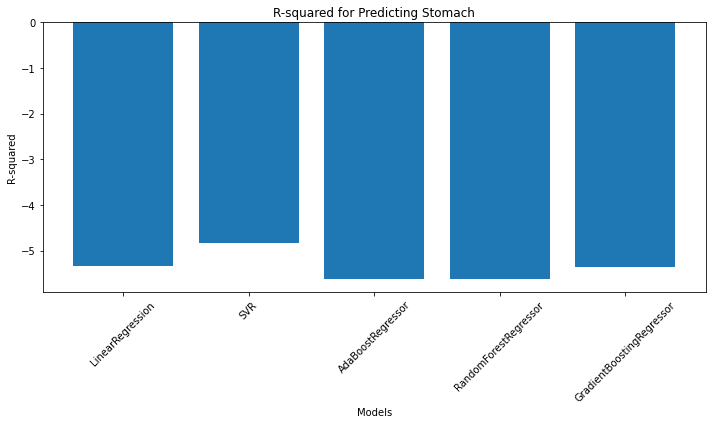

In [14]:
import matplotlib.pyplot as plt

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Define the evaluation metrics
metrics = ['RMSE', 'MAE', 'R-squared']

for metric in metrics:
    for cancer_type in cancer_columns:
        model_names = []  # To store model names
        metric_values = []  # To store metric values

        for model in models:
            model_names.append(model.__class__.__name__)
            model.fit(X_train, y_train.ravel())
            predictions = model.predict(X_test)
            
            if metric == 'RMSE':
                mse = mean_squared_error(y_test, predictions)
                value = np.sqrt(mse)
            elif metric == 'MAE':
                value = mean_absolute_error(y_test, predictions)
            else:  # Metric is R-squared
                value = r2_score(y_test, predictions)
            
            metric_values.append(value)

        # Create a bar plot to visualize model performance for the current metric
        fig, ax = plt.subplots(figsize=(10, 6))
        x = np.arange(len(model_names))
        ax.bar(x, metric_values)

        ax.set_xlabel('Models')
        ax.set_ylabel(metric)
        ax.set_title(f'{metric} for Predicting {cancer_type}')
        ax.set_xticks(x)
        ax.set_xticklabels(model_names, rotation=45)

        plt.tight_layout()
        plt.show()


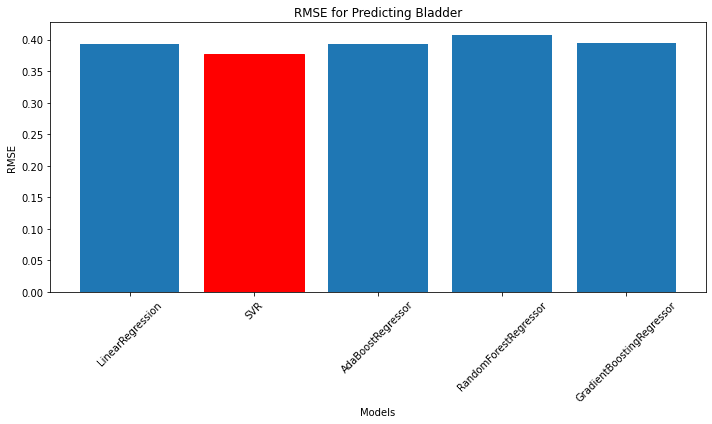

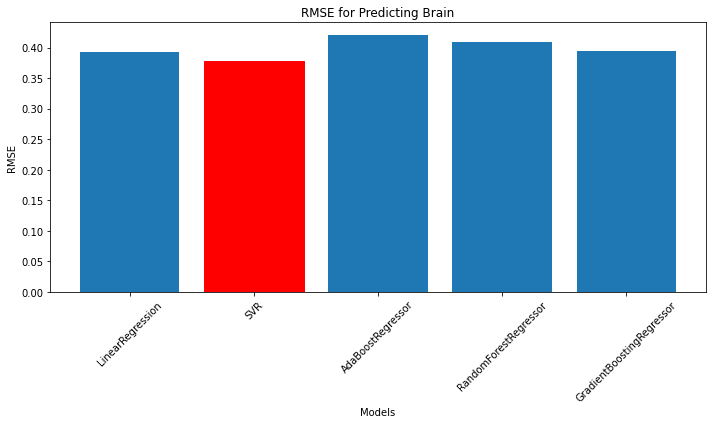

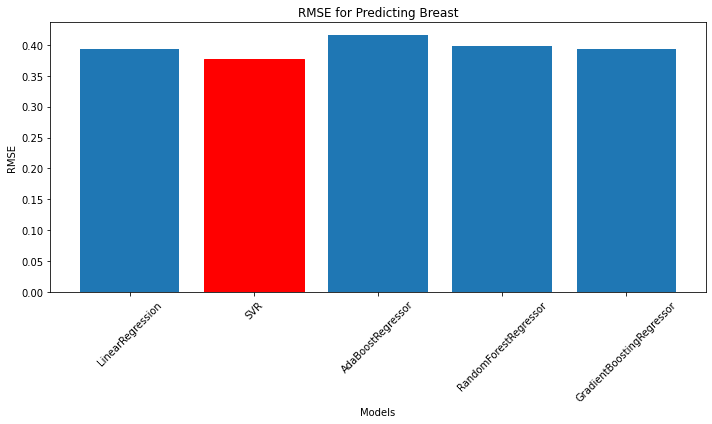

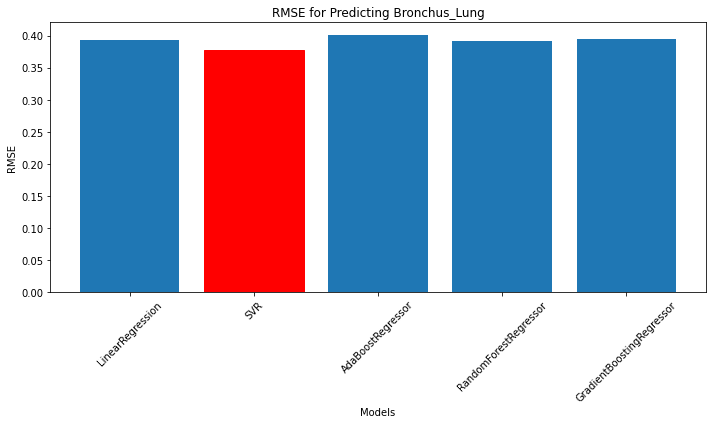

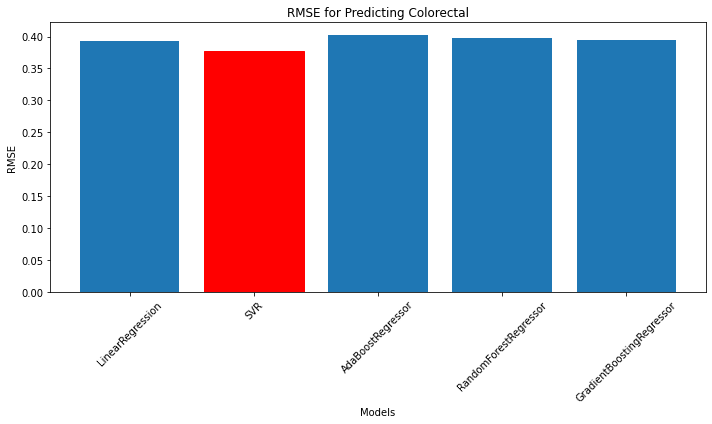

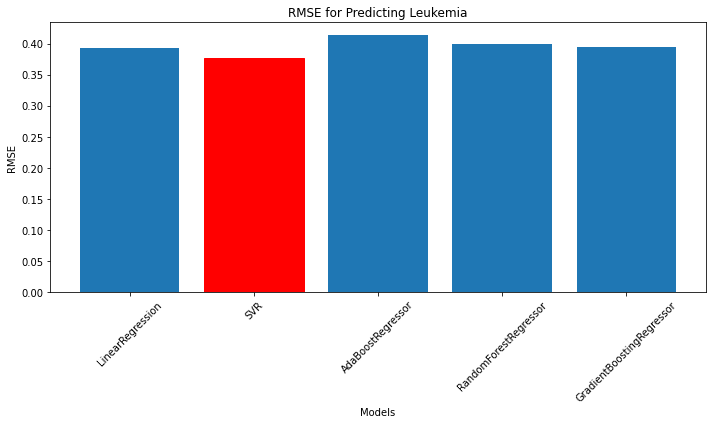

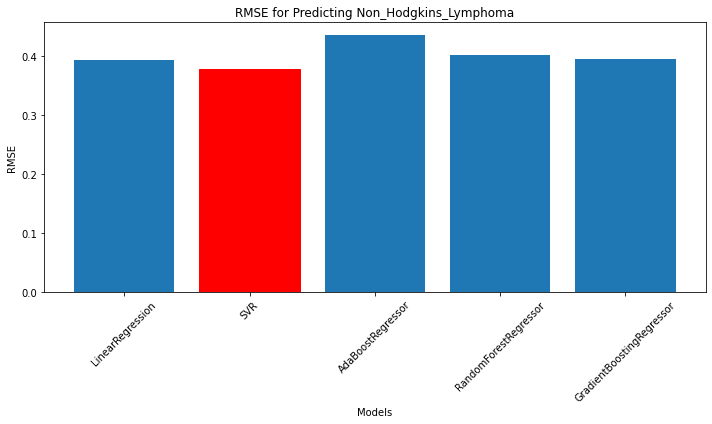

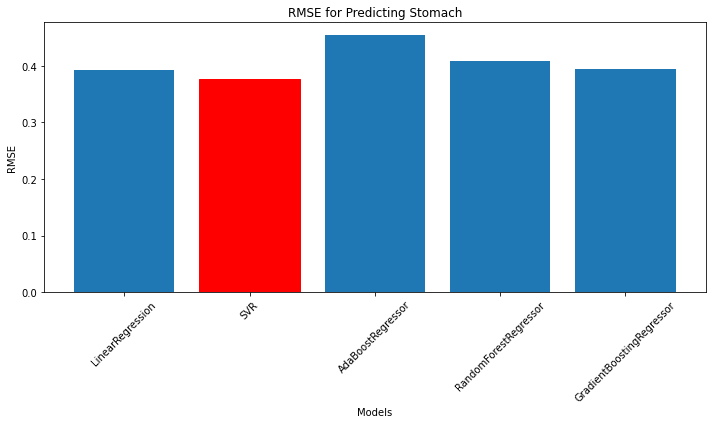

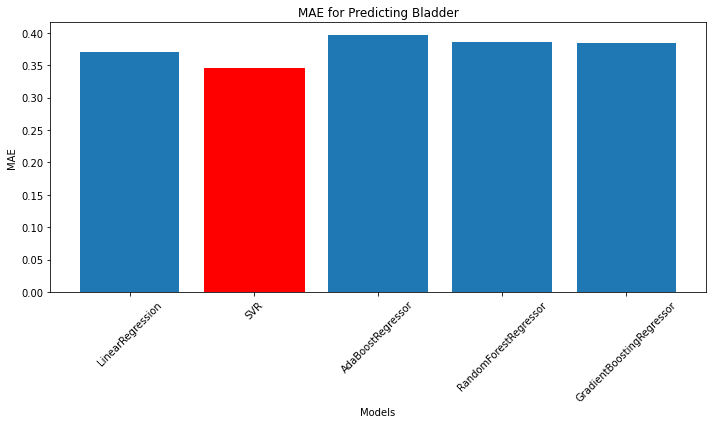

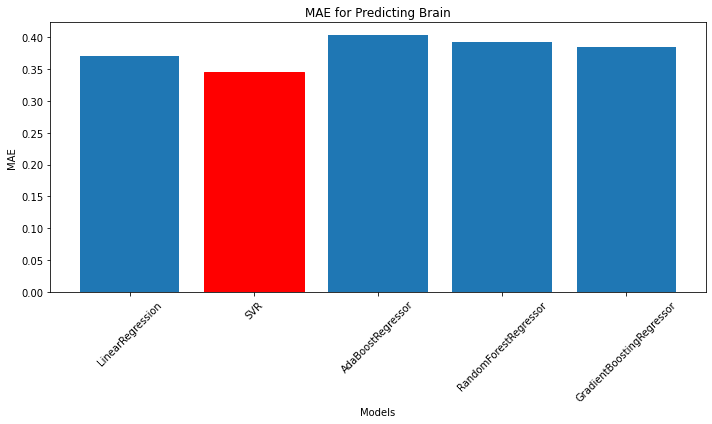

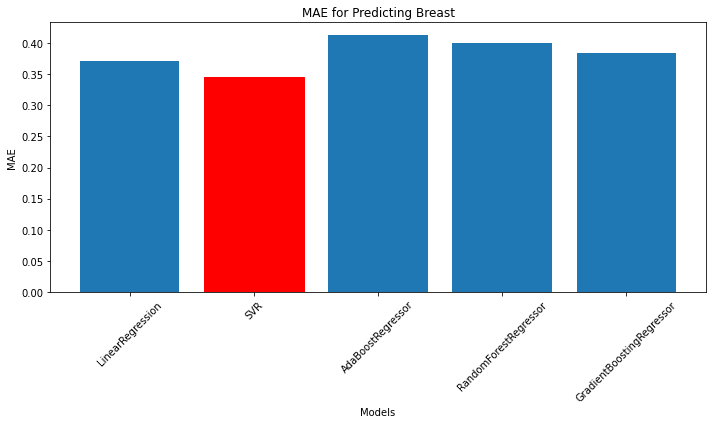

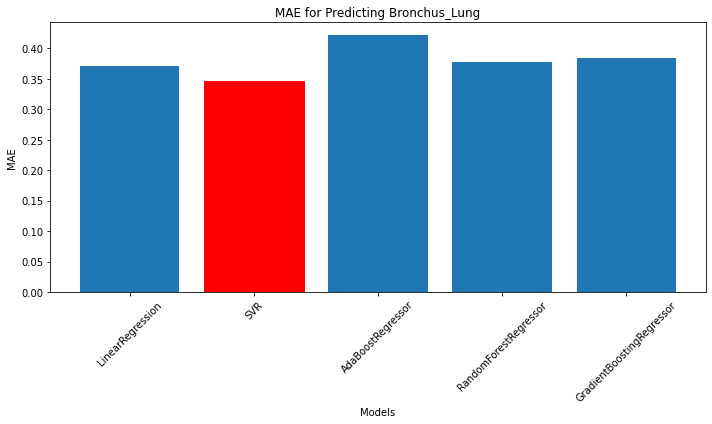

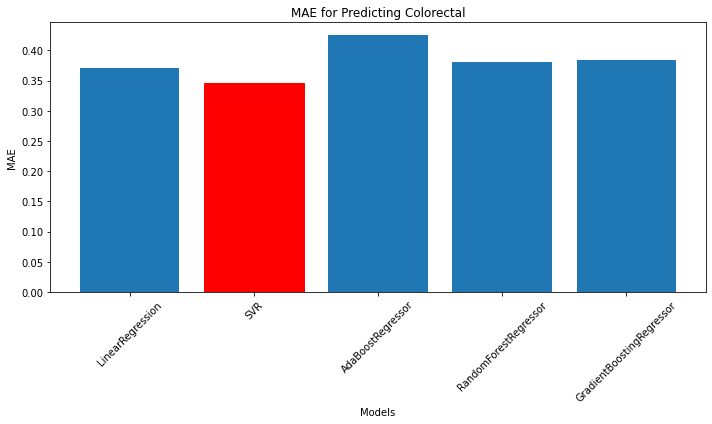

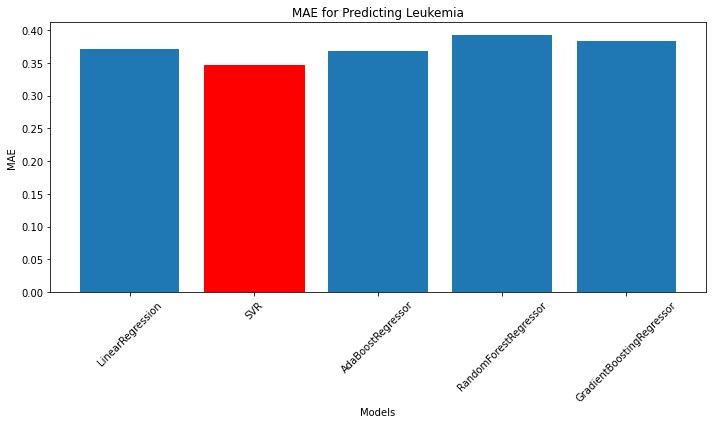

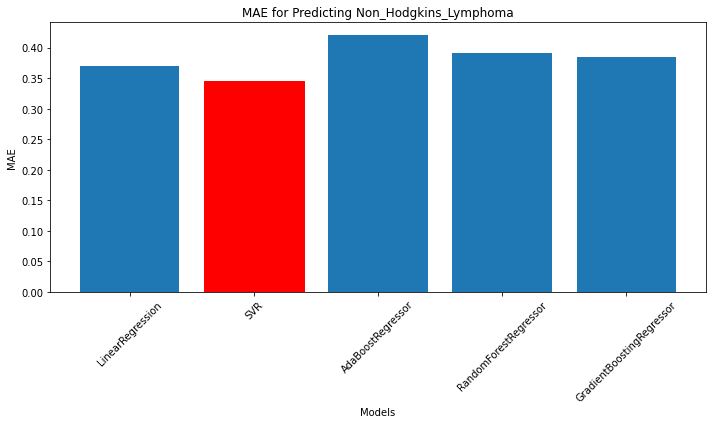

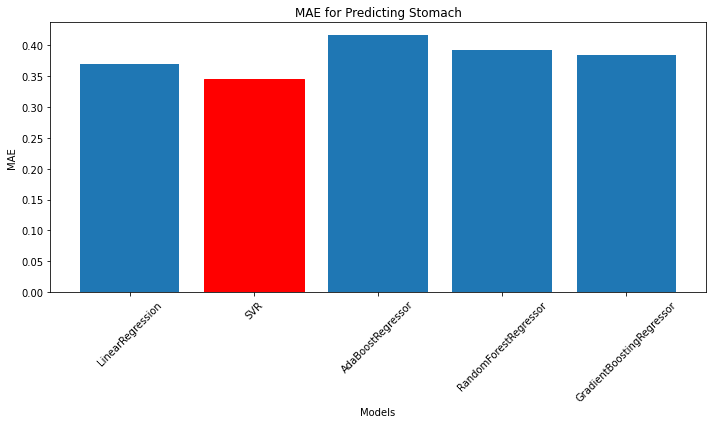

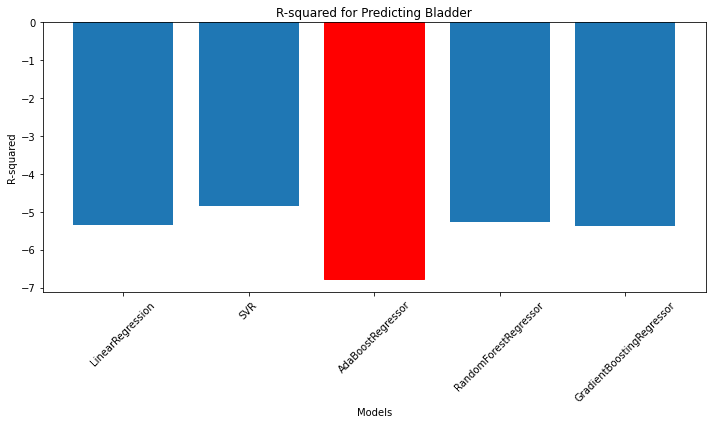

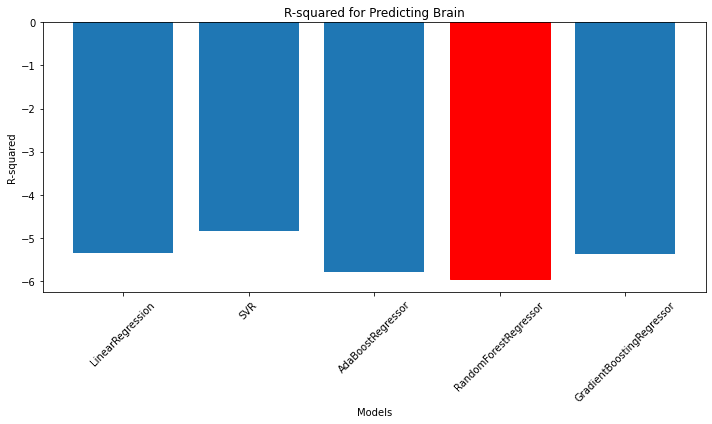

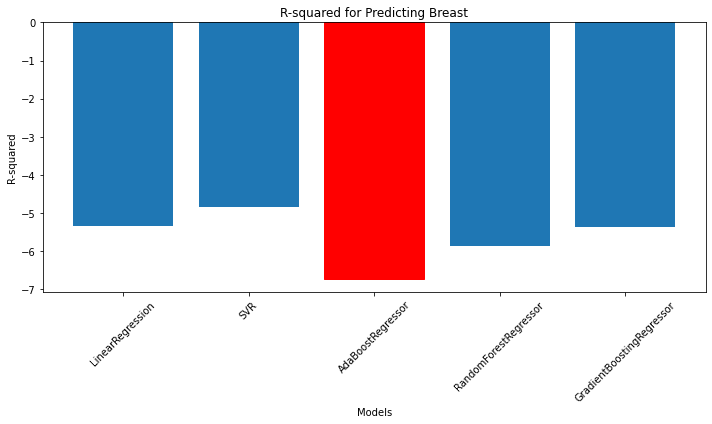

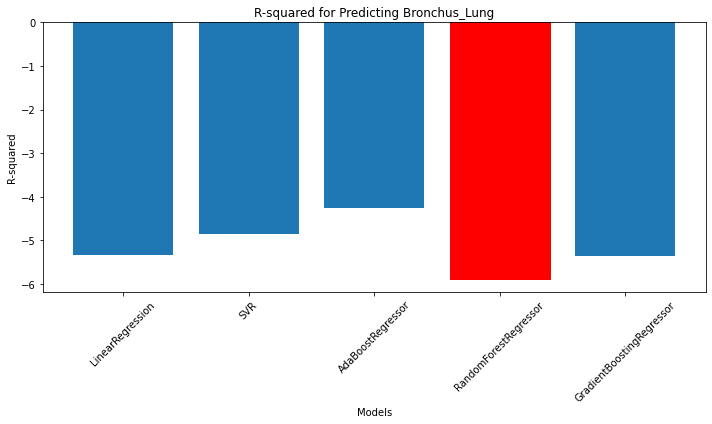

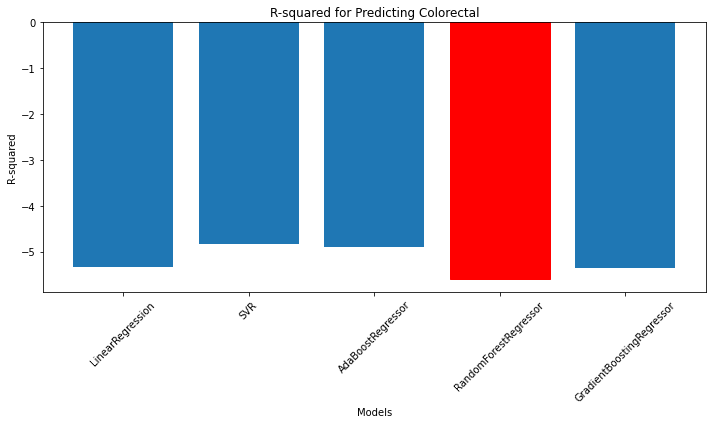

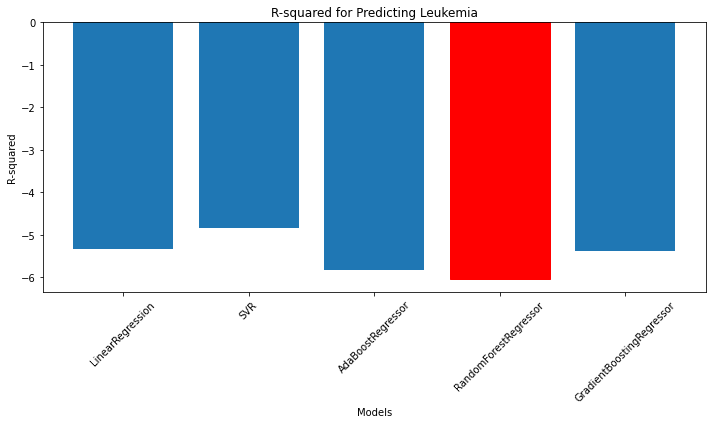

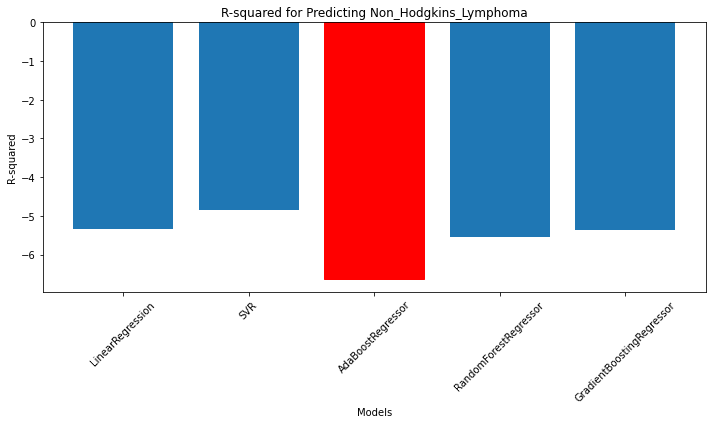

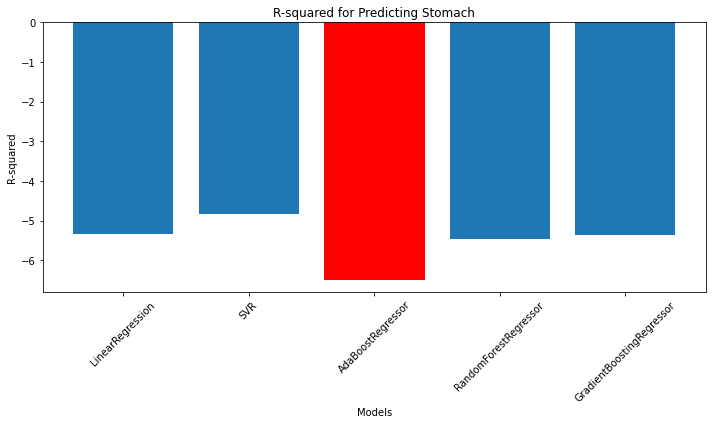

In [15]:
import matplotlib.pyplot as plt

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

for eval_metric in ['RMSE', 'MAE', 'R-squared']:
    for cancer_type in cancer_columns:
        model_names = []  # To store model names
        eval_metric_values = []  # To store evaluation metric values

        for model in models:
            model_names.append(model.__class__.__name__)
            model.fit(X_train, y_train.ravel())
            predictions = model.predict(X_test)
            mse = mean_squared_error(y_test, predictions)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)

            if eval_metric == 'RMSE':
                eval_metric_values.append(rmse)
            elif eval_metric == 'MAE':
                eval_metric_values.append(mae)
            else:
                eval_metric_values.append(r2)

        # Find the index of the model with the lowest evaluation metric value
        min_index = eval_metric_values.index(min(eval_metric_values))

        # Create a bar plot to visualize model performance
        fig, ax = plt.subplots(figsize=(10, 6))
        x = np.arange(len(model_names))
        width = 0.3
        bars = ax.bar(x, eval_metric_values)

        # Highlight the least performing model in a different color
        bars[min_index].set_color('red')

        ax.set_xlabel('Models')
        ax.set_ylabel(eval_metric)
        ax.set_title(f'{eval_metric} for Predicting {cancer_type}')
        ax.set_xticks(x)
        ax.set_xticklabels(model_names, rotation=45)

        plt.tight_layout()
        plt.show()


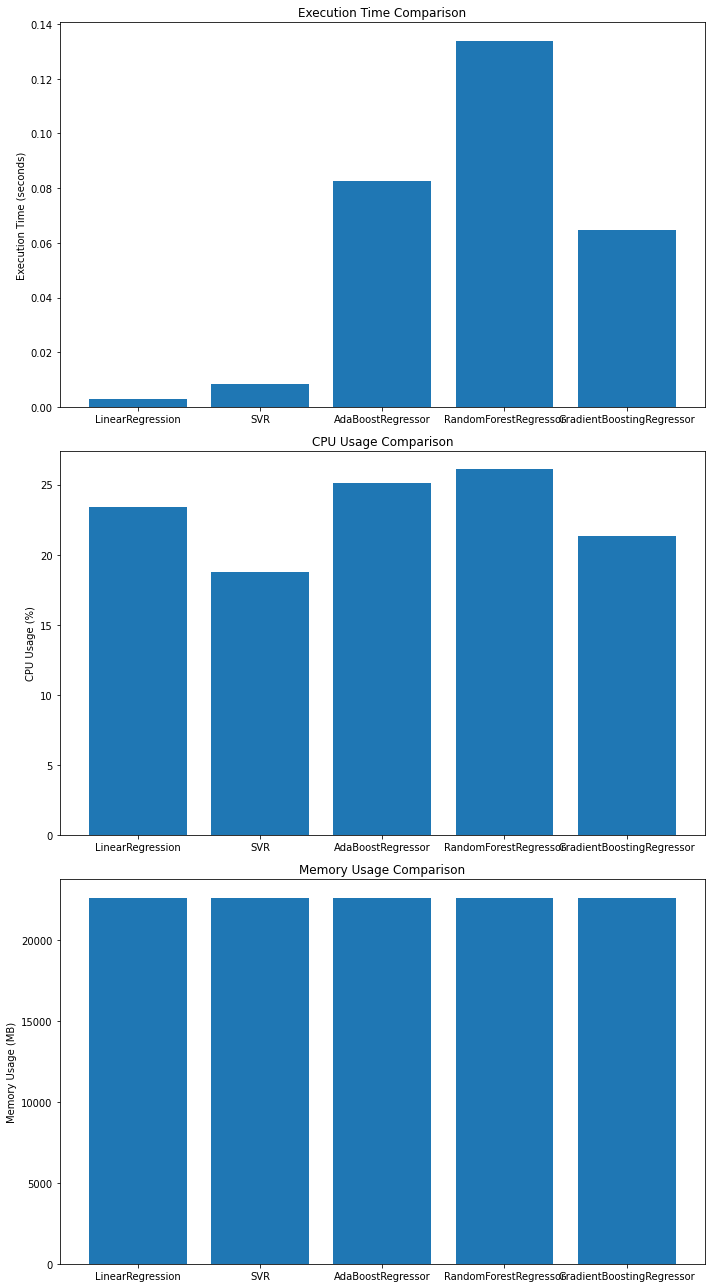

In [16]:
import matplotlib.pyplot as plt
import psutil

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

model_names = []  # To store model names
execution_times = []  # To store execution times
cpu_percentages = []  # To store CPU percentages
memory_usages = []  # To store memory usages

for cancer_type in cancer_columns:
    for model in models:
        model_names.append(model.__class__.__name__)
        
        start_time = time.time()
        model.fit(X_train, y_train.ravel())
        predictions = model.predict(X_test)
        execution_time = time.time() - start_time
        execution_times.append(execution_time)

        cpu_percent = psutil.cpu_percent(interval=1)
        cpu_percentages.append(cpu_percent)

        memory_info = psutil.virtual_memory()
        memory_usages.append(memory_info.used / (1024 ** 2))

# Create plots for comparison
fig, ax = plt.subplots(3, 1, figsize=(10, 18))

# Execution Time Plot
ax[0].bar(model_names, execution_times)
ax[0].set_ylabel('Execution Time (seconds)')
ax[0].set_title('Execution Time Comparison')

# CPU Usage Plot
ax[1].bar(model_names, cpu_percentages)
ax[1].set_ylabel('CPU Usage (%)')
ax[1].set_title('CPU Usage Comparison')

# Memory Usage Plot
ax[2].bar(model_names, memory_usages)
ax[2].set_ylabel('Memory Usage (MB)')
ax[2].set_title('Memory Usage Comparison')

plt.tight_layout()
plt.show()


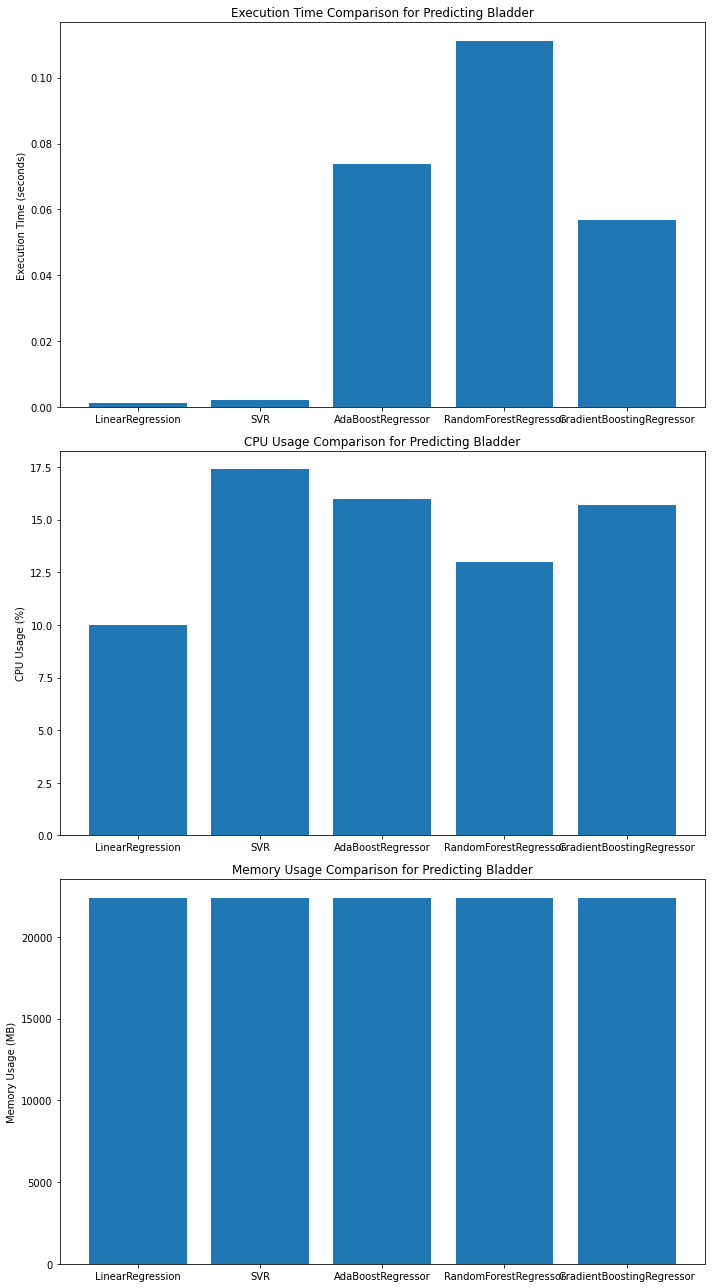

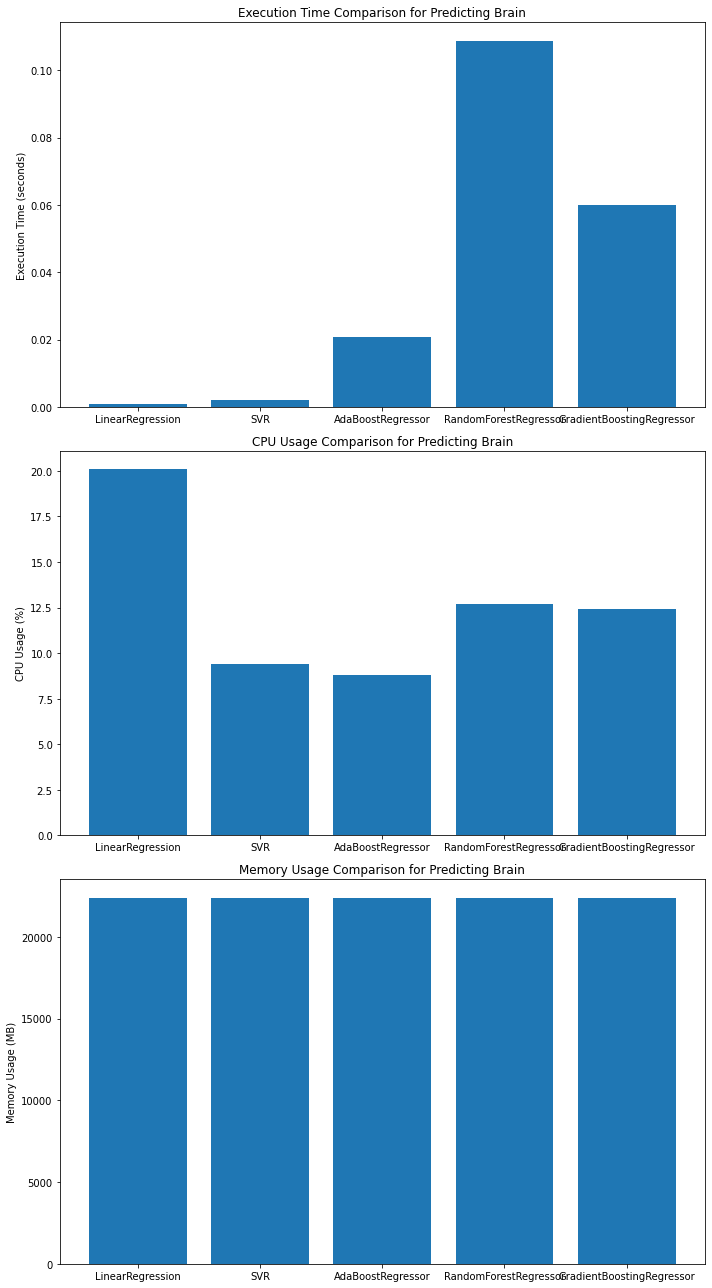

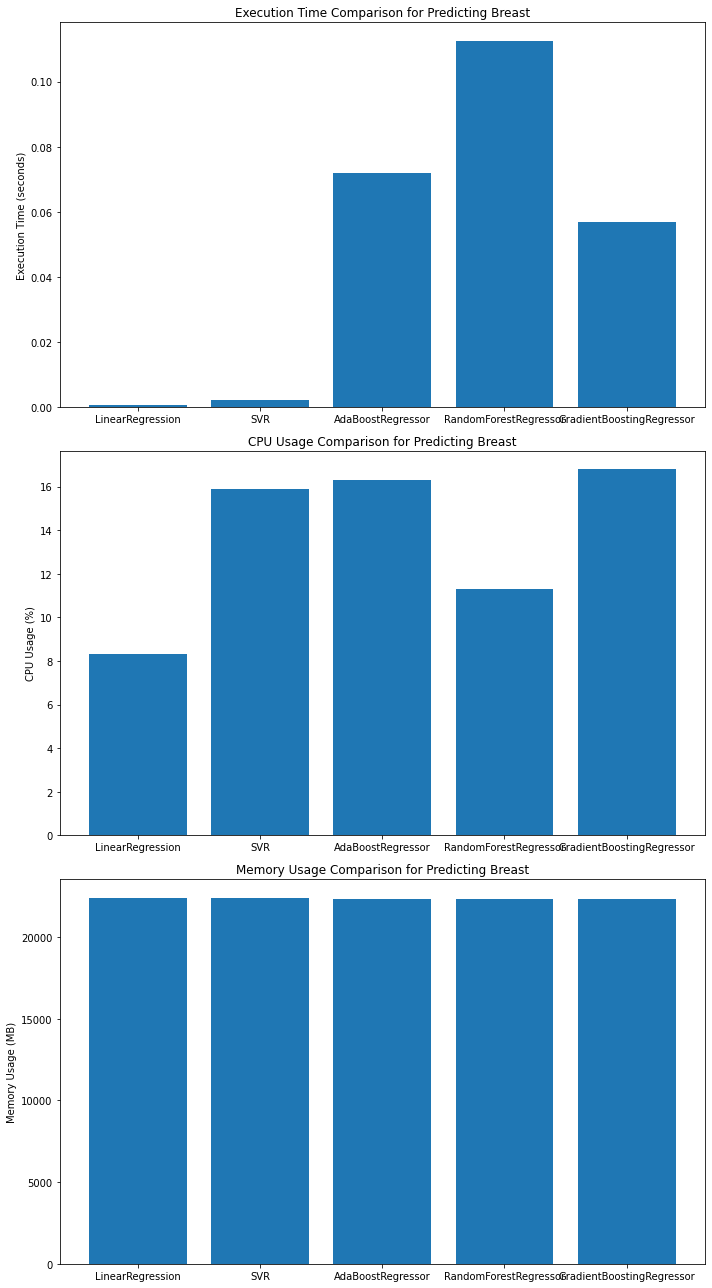

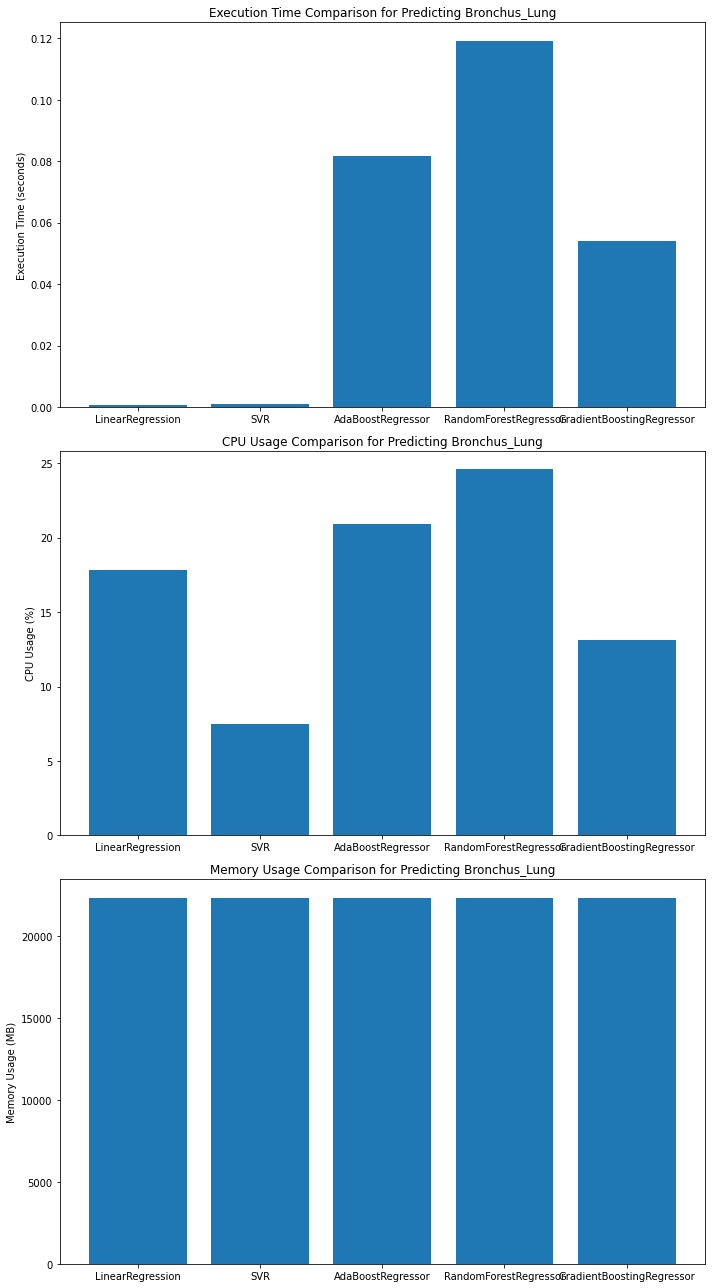

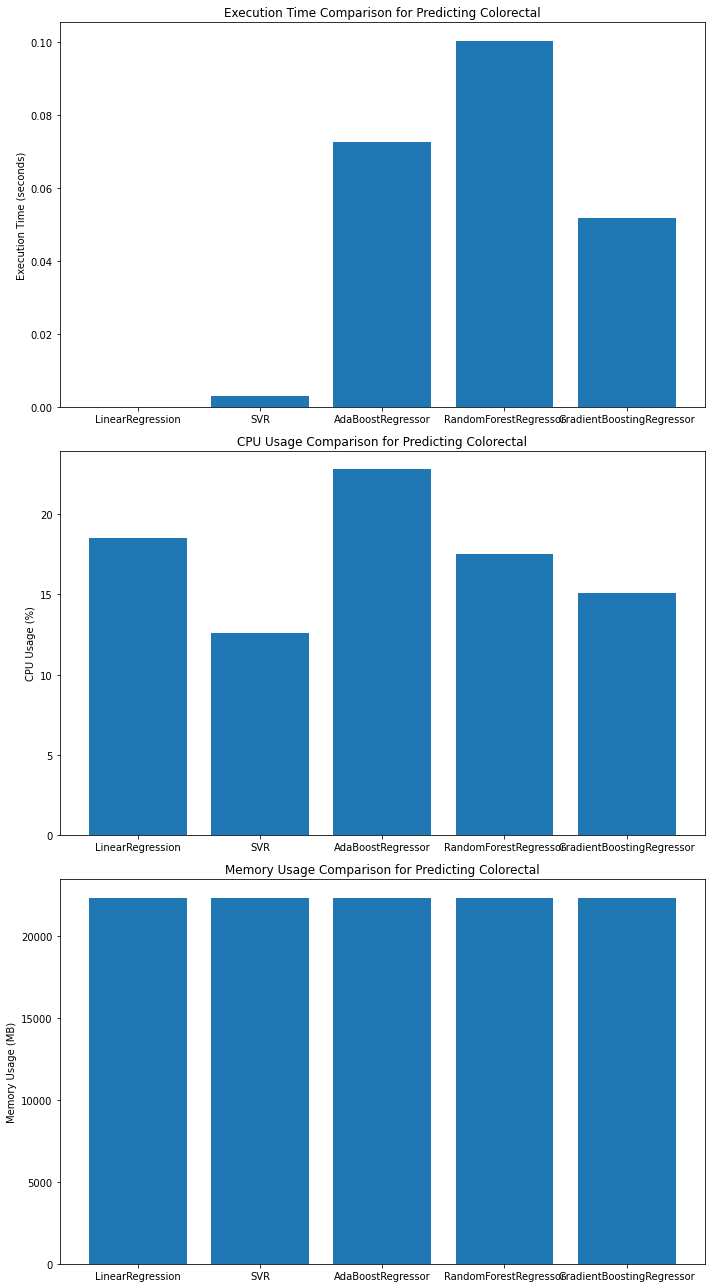

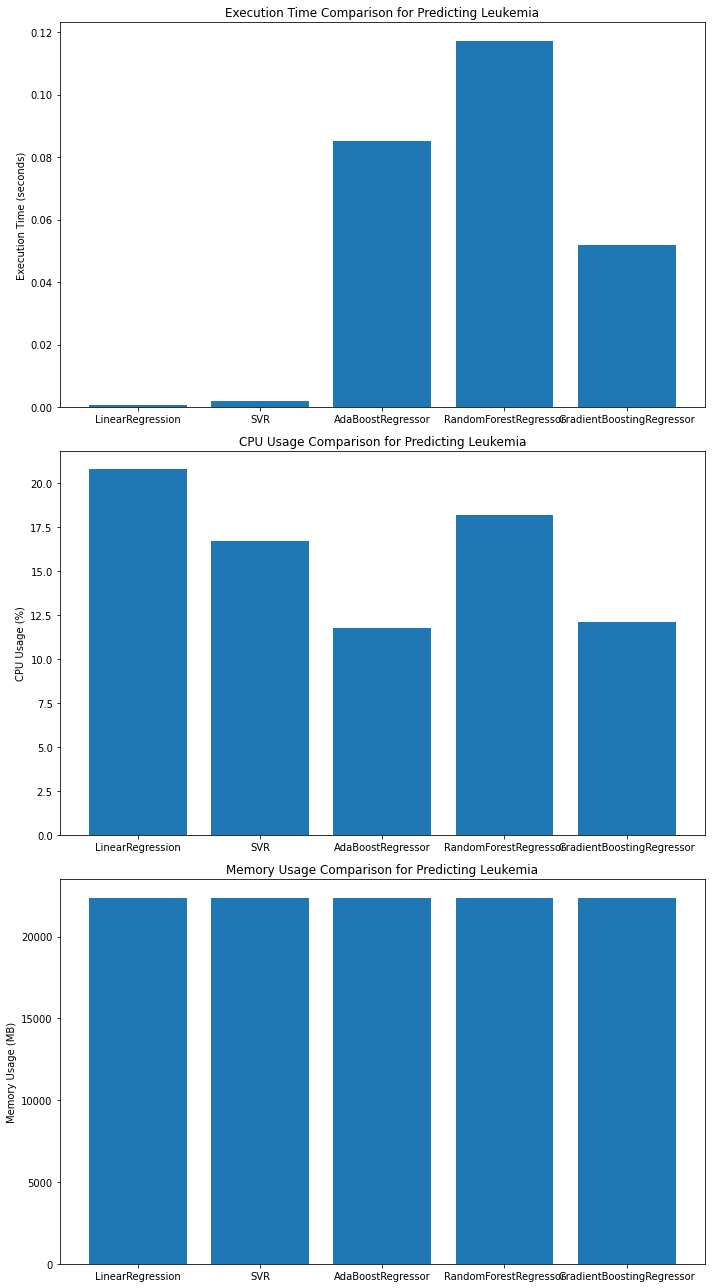

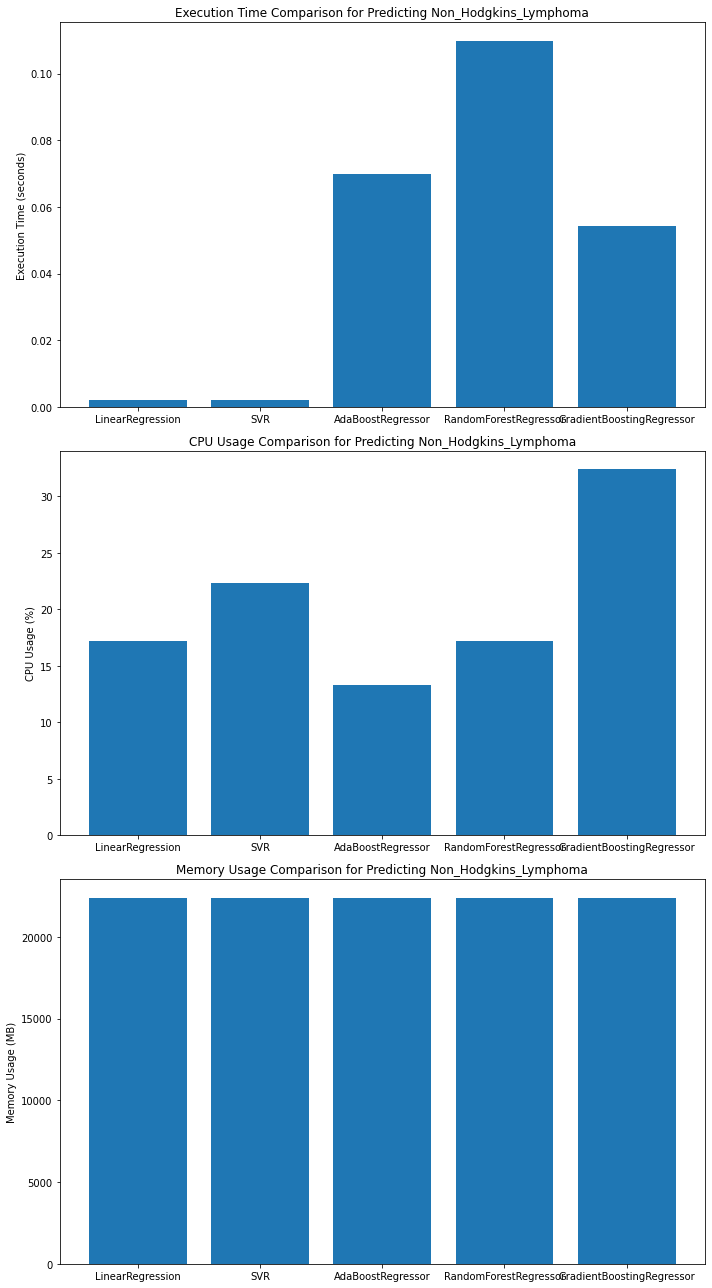

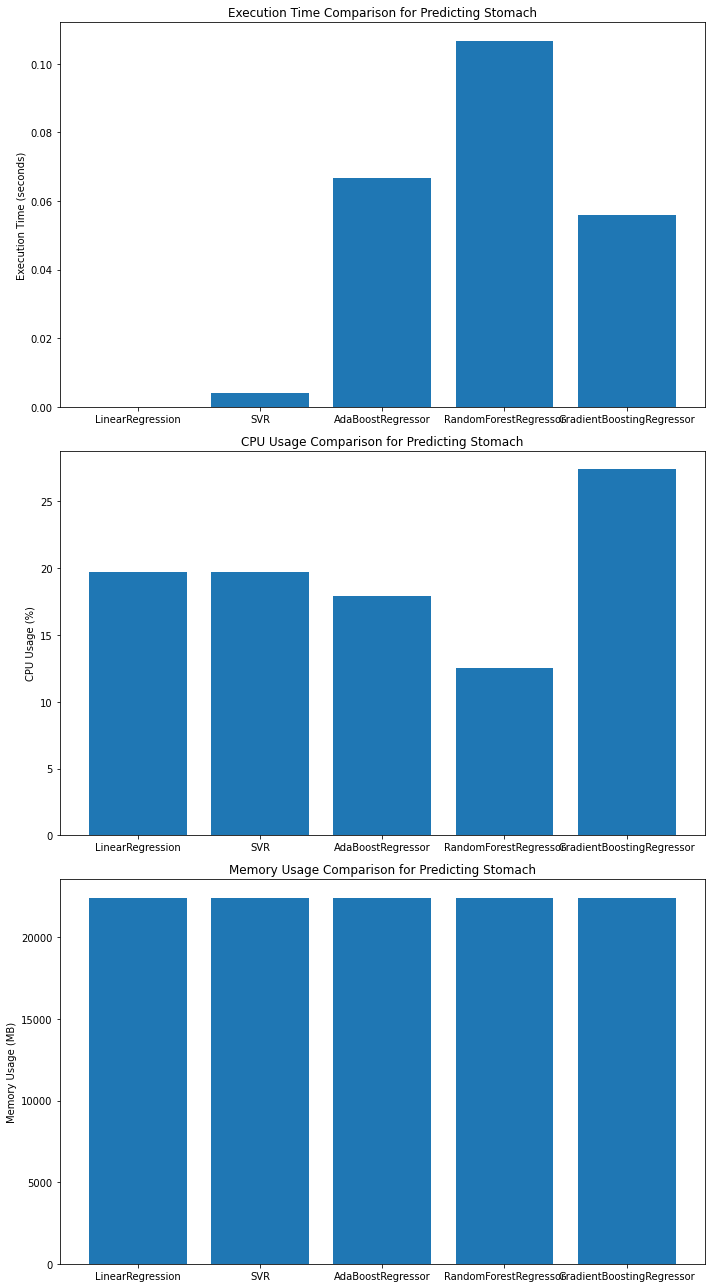

In [17]:
import matplotlib.pyplot as plt
import psutil

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

for cancer_type in cancer_columns:
    model_names = []  # To store model names
    execution_times = []  # To store execution times
    cpu_percentages = []  # To store CPU percentages
    memory_usages = []  # To store memory usages

    for model in models:
        model_names.append(model.__class__.__name__)

        start_time = time.time()
        model.fit(X_train, y_train.ravel())
        predictions = model.predict(X_test)
        execution_time = time.time() - start_time
        execution_times.append(execution_time)

        cpu_percent = psutil.cpu_percent(interval=1)
        cpu_percentages.append(cpu_percent)

        memory_info = psutil.virtual_memory()
        memory_usages.append(memory_info.used / (1024 ** 2))

    # Create plots for comparison
    fig, ax = plt.subplots(3, 1, figsize=(10, 18))

    # Execution Time Plot
    ax[0].bar(model_names, execution_times)
    ax[0].set_ylabel('Execution Time (seconds)')
    ax[0].set_title(f'Execution Time Comparison for Predicting {cancer_type}')

    # CPU Usage Plot
    ax[1].bar(model_names, cpu_percentages)
    ax[1].set_ylabel('CPU Usage (%)')
    ax[1].set_title(f'CPU Usage Comparison for Predicting {cancer_type}')

    # Memory Usage Plot
    ax[2].bar(model_names, memory_usages)
    ax[2].set_ylabel('Memory Usage (MB)')
    ax[2].set_title(f'Memory Usage Comparison for Predicting {cancer_type}')

    plt.tight_layout()
    plt.show()


1/1 [==============================] - 0s 20ms/step

Computation calculations for Fold 1:
Execution Time: 5.14 seconds
CPU Usage: 17.4%
Memory Used: 22488.61 MB
1/1 [==============================] - 0s 21ms/step

Computation calculations for Fold 2:
Execution Time: 5.83 seconds
CPU Usage: 22.7%
Memory Used: 22521.18 MB
1/1 [==============================] - 0s 22ms/step

Computation calculations for Fold 3:
Execution Time: 5.22 seconds
CPU Usage: 25.4%
Memory Used: 22587.73 MB
1/1 [==============================] - 0s 22ms/step

Computation calculations for Fold 4:
Execution Time: 5.45 seconds
CPU Usage: 22.9%
Memory Used: 22574.93 MB
1/1 [==============================] - 0s 20ms/step

Computation calculations for Fold 5:
Execution Time: 4.85 seconds
CPU Usage: 19.8%
Memory Used: 22611.30 MB

Best Fold: 3
Best Train RMSE: 11.56080
Best Validation RMSE: 5.08129
Best Train MAE: 9.69745
Best Validation MAE: 4.88731
Best Train R2: 0.08337
Best Validation R2: -0.43442


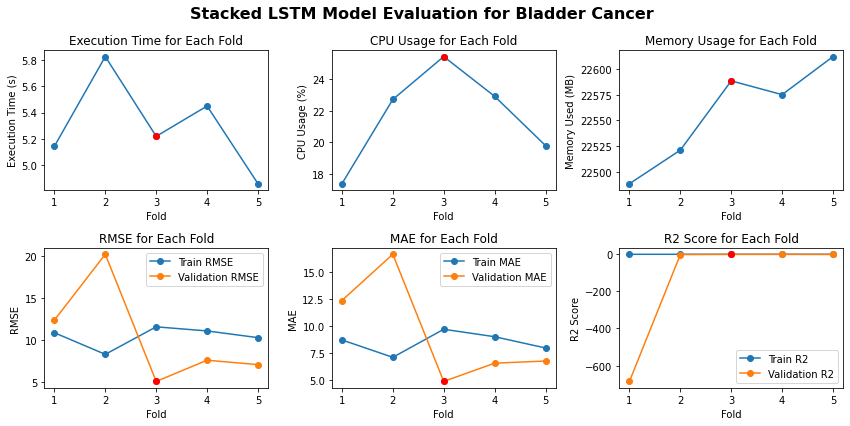

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import psutil
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

np.random.seed(42)

# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Select a cancer type column as the target variable
cancer_type = 'Bladder'  # Change to the desired cancer type

target = data[cancer_type].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Define and train the Stacked LSTM model
        model = Sequential()
        model.add(LSTM(64, return_sequences=True, input_shape=(1, 1)))
        model.add(LSTM(64))
        model.add(Dense(1))
        model.compile(loss='mse', optimizer='adam')
        model.fit(X_train, y_train, epochs=50, verbose=0)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions)
        y_train = scaler.inverse_transform(y_train)
        val_predictions = scaler.inverse_transform(val_predictions)
        y_val = scaler.inverse_transform(y_val)

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the Stacked LSTM model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = psutil.cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if the current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"\nComputation calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage}%")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 6))
plt.suptitle(f'Stacked LSTM Model Evaluation for {cancer_type} Cancer', fontsize=16, fontweight='bold')

plt.subplot(231)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(232)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (%)')

plt.subplot(233)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')

# Plot evaluation metrics for each fold
plt.subplot(234)
train_rmses = [metrics[0] for metrics in eval_metrics]
val_rmses = [metrics[1] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train RMSE')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation RMSE')
plt.plot(best_fold, best_val_rmse, 'ro')
plt.title('RMSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(235)
train_maes = [metrics[2] for metrics in eval_metrics]
val_maes = [metrics[3] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train MAE')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation MAE')
plt.plot(best_fold, best_val_mae, 'ro')
plt.title('MAE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.subplot(236)
train_r2_scores = [metrics[4] for metrics in eval_metrics]
val_r2_scores = [metrics[5] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_r2_scores, 'o-', label='Train R2')
plt.plot(range(1, num_folds + 1), val_r2_scores, 'o-', label='Validation R2')
plt.plot(best_fold, best_val_r2, 'ro')
plt.title('R2 Score for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()


In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import time

np.random.seed(42)

# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Define the regression models to be evaluated
    models = [
        LinearRegression(),
        SVR(),
        AdaBoostRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor()
    ]

    print(f"Predicting {cancer_type}:")

    least_rmse = float('inf')
    best_model_name = ''

    # Train and evaluate each model
    for model in models:
        start_time = time.time()
        model.fit(X_train, y_train.ravel())
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        training_time = time.time() - start_time

        model_name = model.__class__.__name__
        print(f"{model_name} RMSE: {rmse}")
        print(f"{model_name} MAE: {mae}")
        print(f"{model_name} R-squared: {r2}")
        print(f"{model_name} Training Time: {training_time}")

        if rmse < least_rmse:
            least_rmse = rmse
            best_model_name = model_name

    print(f"Least RMSE for {cancer_type}: {least_rmse} (Model: {best_model_name})")
    print()


Predicting Bladder:
LinearRegression RMSE: 0.7662270820504617
LinearRegression MAE: 0.7218898238537779
LinearRegression R-squared: -1.873281363357647
LinearRegression Training Time: 0.0019943714141845703
SVR RMSE: 0.926031747240413
SVR MAE: 0.8236421342997594
SVR R-squared: -3.1967675179211703
SVR Training Time: 0.003938198089599609
AdaBoostRegressor RMSE: 1.9688724671357576
AdaBoostRegressor MAE: 1.672402524041668
AdaBoostRegressor R-squared: -17.971354166666668
AdaBoostRegressor Training Time: 0.07494544982910156
RandomForestRegressor RMSE: 1.3672643714870383
RandomForestRegressor MAE: 1.1735437995230191
RandomForestRegressor R-squared: -8.148884694249562
RandomForestRegressor Training Time: 0.08935332298278809
GradientBoostingRegressor RMSE: 1.9766524628247346
GradientBoostingRegressor MAE: 1.693166957297926
GradientBoostingRegressor R-squared: -18.121580929276345
GradientBoostingRegressor Training Time: 0.04641556739807129
Least RMSE for Bladder: 0.7662270820504617 (Model: LinearRe

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import time

np.random.seed(42)

# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Introduce 30% random missing data
missing_percentage = 0.3
for cancer_type in cancer_columns:
    num_missing = int(len(data) * missing_percentage)
    missing_indices = np.random.choice(len(data), num_missing, replace=False)
    data[cancer_type].iloc[missing_indices] = np.nan

# Initialize lists to store evaluation metrics
eval_metrics = []

# Perform the same model evaluation for each cancer type with missing data
for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Define the regression models to be evaluated
    models = [
        LinearRegression(),
        SVR(),
        AdaBoostRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor()
    ]

    print(f"Predicting {cancer_type}:")

    # Train and evaluate each model
    for model in models:
        model.fit(X_train, y_train.ravel())
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        model_name = model.__class__.__name__
        eval_metrics.append((cancer_type, model_name, rmse, mae, r2))

# Print the evaluation metrics for each cancer type and model
for metric in eval_metrics:
    cancer_type, model_name, rmse, mae, r2 = metric
    print(f"{cancer_type} - {model_name} RMSE: {rmse:.5f}, MAE: {mae:.5f}, R-squared: {r2:.5f}")


C:\Users\Storm\AppData\Local\Temp/ipykernel_46680/3563122256.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Bladder:
Predicting Brain:
Predicting Breast:
Predicting Bronchus_Lung:
Predicting Colorectal:
Predicting Leukemia:
Predicting Non_Hodgkins_Lymphoma:
Predicting Stomach:
Bladder - LinearRegression RMSE: 0.66028, MAE: 0.52611, R-squared: -0.69401
Bladder - SVR RMSE: 0.74476, MAE: 0.59825, R-squared: -1.15526
Bladder - AdaBoostRegressor RMSE: 0.64572, MAE: 0.61785, R-squared: -0.62016
Bladder - RandomForestRegressor RMSE: 0.46204, MAE: 0.39428, R-squared: 0.17047
Bladder - GradientBoostingRegressor RMSE: 0.52992, MAE: 0.49203, R-squared: -0.09113
Brain - LinearRegression RMSE: 1.38104, MAE: 1.28544, R-squared: -11.14882
Brain - SVR RMSE: 1.25882, MAE: 1.17528, R-squared: -9.09375
Brain - AdaBoostRegressor RMSE: 1.13698, MAE: 1.05023, R-squared: -7.23431
Brain - RandomForestRegressor RMSE: 1.20278, MAE: 1.06765, R-squared: -8.21500
Brain - GradientBoostingRegressor RMSE: 1.04731, MAE: 0.92970, R-squared: -5.98676
Breast - LinearRegression RMSE: 1.12373, MAE: 0.98613, R-squared:

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import time

np.random.seed(42)

# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Create a list to store evaluation metrics
eval_metrics = []

# Function to evaluate regression models for a specific cancer type
def evaluate_cancer_type(cancer_type, missing_data=False):
    if missing_data:
        # Introduce 30% random missing data
        missing_percentage = 0.3
        num_missing = int(len(data) * missing_percentage)
        missing_indices = np.random.choice(len(data), num_missing, replace=False)
        data[cancer_type].iloc[missing_indices] = np.nan

    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Define the regression models to be evaluated
    models = [
        LinearRegression(),
        SVR(),
        AdaBoostRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor()
    ]

    print(f"Predicting {cancer_type}{' with missing data' if missing_data else ''}:")

    # Train and evaluate each model
    for model in models:
        model.fit(X_train, y_train.ravel())
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        model_name = model.__class__.__name__
        eval_metrics.append((cancer_type, model_name, rmse, mae, r2, missing_data))

# Evaluate each cancer type with and without missing data
for cancer_type in cancer_columns:
    evaluate_cancer_type(cancer_type, missing_data=False)
    evaluate_cancer_type(cancer_type, missing_data=True)

# Create a DataFrame to store the evaluation metrics
df = pd.DataFrame(eval_metrics, columns=['Cancer Type', 'Model', 'RMSE', 'MAE', 'R-squared', 'Missing Data'])

# Display the DataFrame
print(df)


Predicting Bladder:
Predicting Bladder with missing data:
Predicting Brain:


C:\Users\Storm\AppData\Local\Temp/ipykernel_46680/2490906926.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Brain with missing data:
Predicting Breast:


C:\Users\Storm\AppData\Local\Temp/ipykernel_46680/2490906926.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Breast with missing data:
Predicting Bronchus_Lung:


C:\Users\Storm\AppData\Local\Temp/ipykernel_46680/2490906926.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Bronchus_Lung with missing data:
Predicting Colorectal:


C:\Users\Storm\AppData\Local\Temp/ipykernel_46680/2490906926.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Colorectal with missing data:
Predicting Leukemia:


C:\Users\Storm\AppData\Local\Temp/ipykernel_46680/2490906926.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Leukemia with missing data:
Predicting Non_Hodgkins_Lymphoma:


C:\Users\Storm\AppData\Local\Temp/ipykernel_46680/2490906926.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Non_Hodgkins_Lymphoma with missing data:
Predicting Stomach:


C:\Users\Storm\AppData\Local\Temp/ipykernel_46680/2490906926.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Stomach with missing data:
   Cancer Type                      Model      RMSE       MAE  R-squared  \
0      Bladder           LinearRegression  0.766227  0.721890  -1.873281   
1      Bladder                        SVR  0.926032  0.823642  -3.196768   
2      Bladder          AdaBoostRegressor  1.968872  1.672403 -17.971354   
3      Bladder      RandomForestRegressor  1.367264  1.173544  -8.148885   
4      Bladder  GradientBoostingRegressor  1.976652  1.693167 -18.121581   
..         ...                        ...       ...       ...        ...   
75     Stomach           LinearRegression  1.171834  1.021965  -1.603202   
76     Stomach                        SVR  1.182445  0.978892  -1.650559   
77     Stomach          AdaBoostRegressor  1.246277  0.992777  -1.944453   
78     Stomach      RandomForestRegressor  1.215959  0.923470  -1.802937   
79     Stomach  GradientBoostingRegressor  1.264317  1.064418  -2.030314   

    Missing Data  
0          False  
1          

In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression, SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

np.random.seed(42)

# Load and preprocess the cancer dataset
# (Assuming you have already loaded and preprocessed the dataset)
# ...

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize a list to store evaluation metrics
eval_metrics = []

# Perform the same model evaluation for each cancer type with and without missing data
for cancer_type in cancer_columns:
    for missing_data_flag in [False, True]:
        if missing_data_flag:
            # Introduce 30% random missing data
            missing_percentage = 0.3
            num_missing = int(len(data) * missing_percentage)
            missing_indices = np.random.choice(len(data), num_missing, replace=False)
            data_with_missing = data.copy()
            data_with_missing[cancer_type].iloc[missing_indices] = np.nan
            target = data_with_missing[cancer_type].values.reshape(-1, 1)
        else:
            target = data[cancer_type].values.reshape(-1, 1)

        # Handle missing values by imputing with the mean of the available values
        target = np.nan_to_num(target, nan=np.nanmean(target))

        # Normalize the target variable
        scaler = StandardScaler()
        target_scaled = scaler.fit_transform(target)

        # Split the data into training and testing sets
        train_size = 15  # Number of years for training
        test_size = 5  # Number of years for testing

        train_data = target_scaled[:train_size]
        test_data = target_scaled[train_size:train_size + test_size]

        # Split into input and output variables
        X_train = train_data[:-1]
        y_train = train_data[1:]
        X_test = test_data[:-1]
        y_test = test_data[1:]

        # Define the regression models to be evaluated
        models = [
            LinearRegression(),
            SVR(),
            AdaBoostRegressor(),
            RandomForestRegressor(),
            GradientBoostingRegressor()
        ]

        # Train and evaluate each model
        for model in models:
            model.fit(X_train, y_train.ravel())
            predictions = model.predict(X_test)
            mse = mean_squared_error(y_test, predictions)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)

            model_name = model.__class__.__name__
            eval_metrics.append({
                'Cancer Type': cancer_type,
                'Missing Data': missing_data_flag,
                'Model': model_name,
                'RMSE': rmse,
                'MAE': mae,
                'R-squared': r2
            })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(eval_metrics)

# Print the DataFrame
print(results_df)


C:\Users\Storm\AppData\Local\Temp/ipykernel_46680/126530717.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_missing[cancer_type].iloc[missing_indices] = np.nan
C:\Users\Storm\AppData\Local\Temp/ipykernel_46680/126530717.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_missing[cancer_type].iloc[missing_indices] = np.nan
C:\Users\Storm\AppData\Local\Temp/ipykernel_46680/126530717.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

   Cancer Type  Missing Data                      Model      RMSE       MAE  \
0      Bladder         False           LinearRegression  0.624532  0.548727   
1      Bladder         False                        SVR  0.890177  0.815727   
2      Bladder         False          AdaBoostRegressor  1.646439  1.218818   
3      Bladder         False      RandomForestRegressor  1.262842  1.055424   
4      Bladder         False  GradientBoostingRegressor  1.669615  1.282408   
..         ...           ...                        ...       ...       ...   
75     Stomach          True           LinearRegression  1.517197  1.234064   
76     Stomach          True                        SVR  1.275003  0.877537   
77     Stomach          True          AdaBoostRegressor  1.398388  1.020133   
78     Stomach          True      RandomForestRegressor  1.234458  0.813836   
79     Stomach          True  GradientBoostingRegressor  1.259112  0.852394   

    R-squared  
0   -0.897683  
1   -2.855376  
2  

C:\Users\Storm\AppData\Local\Temp/ipykernel_46680/126530717.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_missing[cancer_type].iloc[missing_indices] = np.nan


In [24]:
results_df

,Cancer Type,Missing Data,Model,RMSE,MAE,R-squared
0,Bladder,False,LinearRegression,0.624532,0.548727,-0.897683
1,Bladder,False,SVR,0.890177,0.815727,-2.855376
2,Bladder,False,AdaBoostRegressor,1.646439,1.218818,-12.188787
3,Bladder,False,RandomForestRegressor,1.262842,1.055424,-6.759109
4,Bladder,False,GradientBoostingRegressor,1.669615,1.282408,-12.562717
...,...,...,...,...,...,...
75,Stomach,True,LinearRegression,1.517197,1.234064,-1.623914
76,Stomach,True,SVR,1.275003,0.877537,-0.853054
77,Stomach,True,AdaBoostRegressor,1.398388,1.020133,-1.229058
78,Stomach,True,RandomForestRegressor,1.234458,0.813836,-0.737075


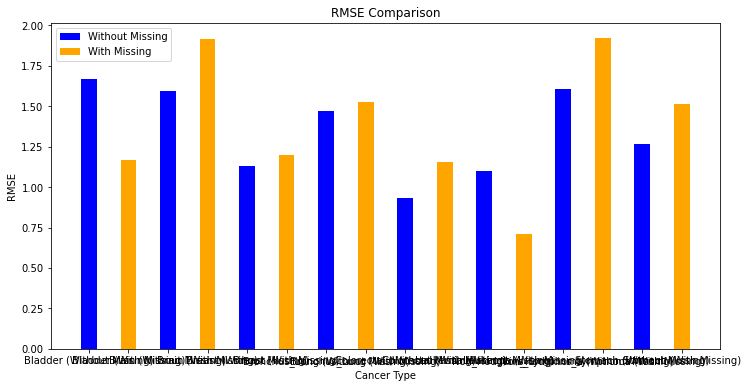

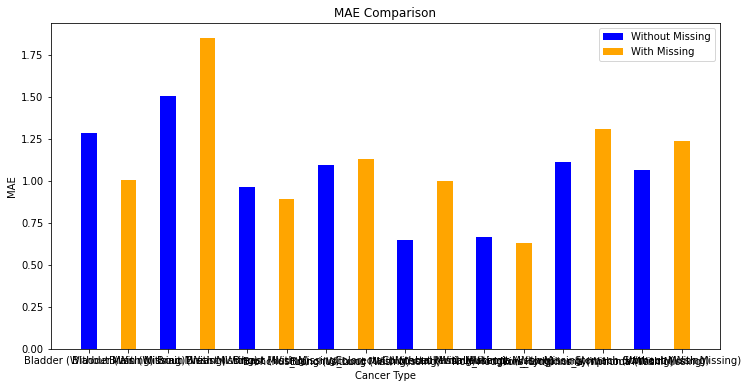

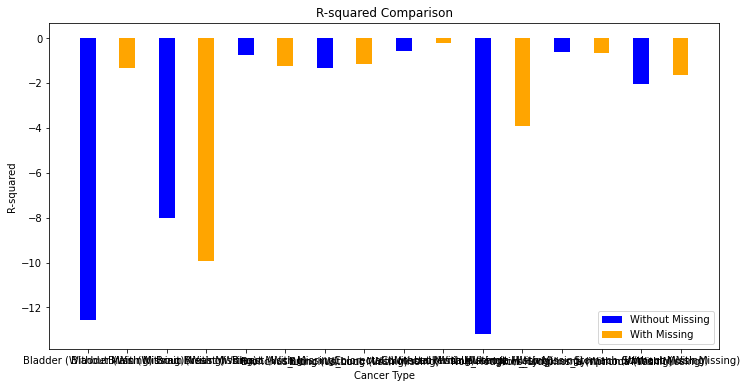

In [26]:
import matplotlib.pyplot as plt

# Assuming you have already computed 'results_df' from the previous code

# Group the data by 'Cancer Type', 'Model', and 'Missing Data'
grouped_data = results_df.groupby(['Cancer Type', 'Model', 'Missing Data']).mean().reset_index()

# Define a function to plot the metrics
def plot_metrics(metric_name):
    plt.figure(figsize=(12, 6))
    for cancer_type in cancer_columns:
        without_missing = grouped_data[(grouped_data['Cancer Type'] == cancer_type) & (grouped_data['Missing Data'] == False)][metric_name]
        with_missing = grouped_data[(grouped_data['Cancer Type'] == cancer_type) & (grouped_data['Missing Data'] == True)][metric_name]

        plt.bar(cancer_type + ' (Without Missing)', without_missing, color='blue', width=0.4)
        plt.bar(cancer_type + ' (With Missing)', with_missing, color='orange', width=0.4)

    plt.xlabel('Cancer Type')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} Comparison')
    plt.legend(['Without Missing', 'With Missing'])
    plt.show()

# Plot RMSE, MAE, and R-squared comparisons
plot_metrics('RMSE')
plot_metrics('MAE')
plot_metrics('R-squared')


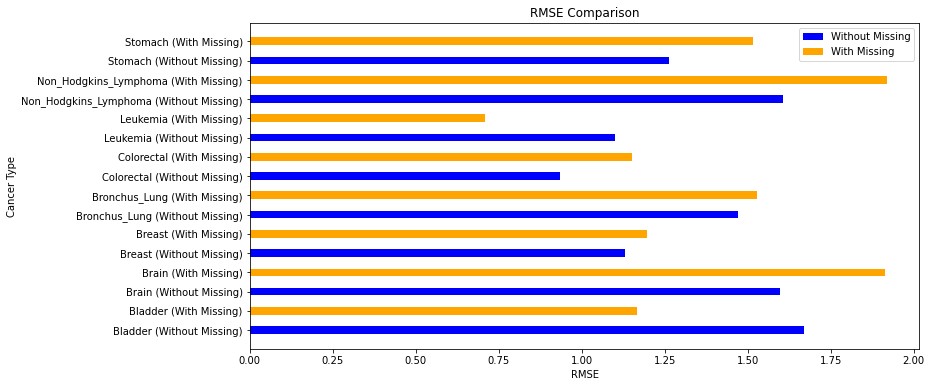

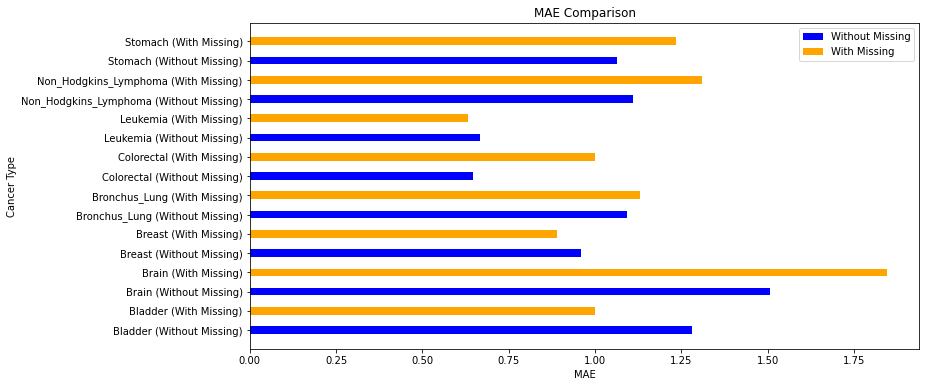

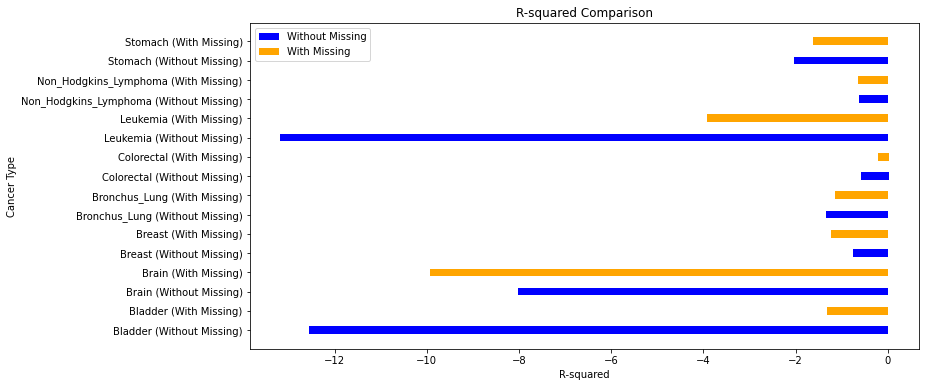

In [33]:
import matplotlib.pyplot as plt

# Assuming you have already computed 'results_df' from the previous code

# Group the data by 'Cancer Type', 'Model', and 'Missing Data'
grouped_data = results_df.groupby(['Cancer Type', 'Model', 'Missing Data']).mean().reset_index()

# Define a function to plot the metrics
def plot_metrics(metric_name):
    plt.figure(figsize=(12, 6))
    for cancer_type in cancer_columns:
        without_missing = grouped_data[(grouped_data['Cancer Type'] == cancer_type) & (grouped_data['Missing Data'] == False)][metric_name]
        with_missing = grouped_data[(grouped_data['Cancer Type'] == cancer_type) & (grouped_data['Missing Data'] == True)][metric_name]

        plt.barh(cancer_type + ' (Without Missing)', without_missing, color='blue', height=0.4)
        plt.barh(cancer_type + ' (With Missing)', with_missing, color='orange', height=0.4)

    plt.xlabel(metric_name)
    plt.ylabel('Cancer Type')
    plt.title(f'{metric_name} Comparison')
    plt.legend(['Without Missing', 'With Missing'])
    plt.show()

# Plot RMSE, MAE, and R-squared comparisons
plot_metrics('RMSE')
plot_metrics('MAE')
plot_metrics('R-squared')


In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import time

np.random.seed(42)

# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Introduce 10% random missing data
missing_percentage = 0.1
for cancer_type in cancer_columns:
    num_missing = int(len(data) * missing_percentage)
    missing_indices = np.random.choice(len(data), num_missing, replace=False)
    data[cancer_type].iloc[missing_indices] = np.nan

# Initialize lists to store evaluation metrics
eval_metrics = []

# Perform the same model evaluation for each cancer type with missing data
for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Define the regression models to be evaluated
    models = [
        LinearRegression(),
        SVR(),
        AdaBoostRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor()
    ]

    print(f"Predicting {cancer_type}:")

    # Train and evaluate each model
    for model in models:
        model.fit(X_train, y_train.ravel())
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        model_name = model.__class__.__name__
        eval_metrics.append((cancer_type, model_name, rmse, mae, r2))

# Print the evaluation metrics for each cancer type and model
for metric in eval_metrics:
    cancer_type, model_name, rmse, mae, r2 = metric
    print(f"{cancer_type} - {model_name} RMSE: {rmse:.5f}, MAE: {mae:.5f}, R-squared: {r2:.5f}")


C:\Users\Storm\AppData\Local\Temp/ipykernel_46680/1330097568.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cancer_type].iloc[missing_indices] = np.nan


Predicting Bladder:
Predicting Brain:
Predicting Breast:
Predicting Bronchus_Lung:
Predicting Colorectal:
Predicting Leukemia:
Predicting Non_Hodgkins_Lymphoma:
Predicting Stomach:
Bladder - LinearRegression RMSE: 0.73322, MAE: 0.62354, R-squared: -1.37113
Bladder - SVR RMSE: 0.88567, MAE: 0.74956, R-squared: -2.45958
Bladder - AdaBoostRegressor RMSE: 1.80722, MAE: 1.46539, R-squared: -13.40465
Bladder - RandomForestRegressor RMSE: 1.20014, MAE: 0.98431, R-squared: -5.35253
Bladder - GradientBoostingRegressor RMSE: 1.80306, MAE: 1.46065, R-squared: -13.33854
Brain - LinearRegression RMSE: 1.23244, MAE: 1.07107, R-squared: -9.76750
Brain - SVR RMSE: 1.40533, MAE: 1.36550, R-squared: -13.00043
Brain - AdaBoostRegressor RMSE: 1.29379, MAE: 1.23807, R-squared: -10.86622
Brain - RandomForestRegressor RMSE: 1.15008, MAE: 1.07616, R-squared: -8.37659
Brain - GradientBoostingRegressor RMSE: 1.01199, MAE: 0.89678, R-squared: -6.26010
Breast - LinearRegression RMSE: 1.25699, MAE: 1.24763, R-squa

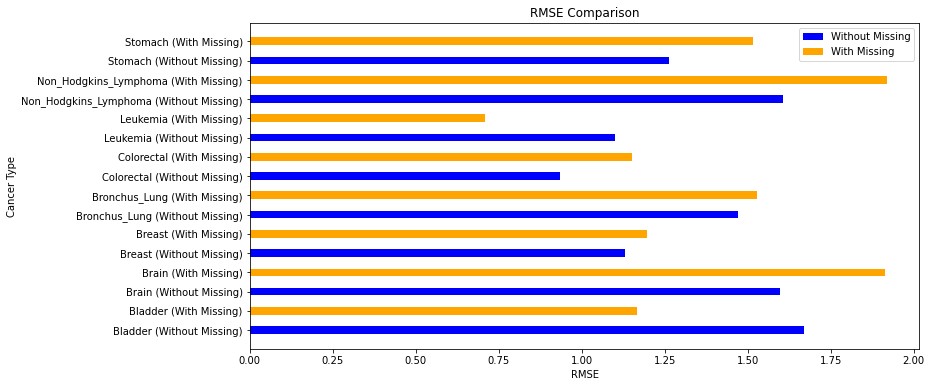

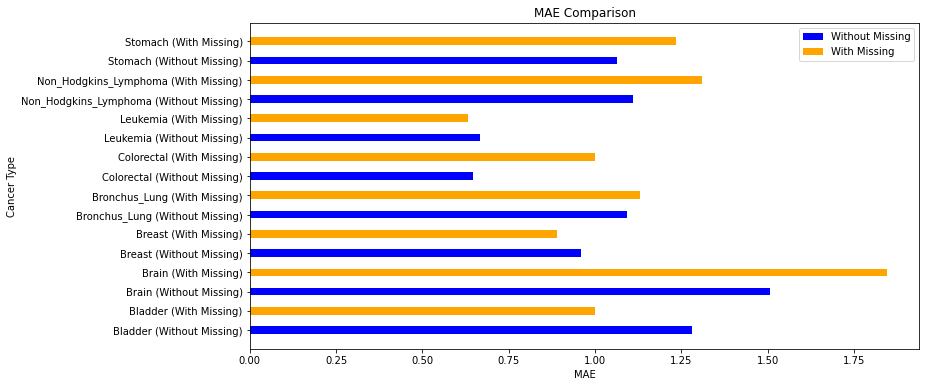

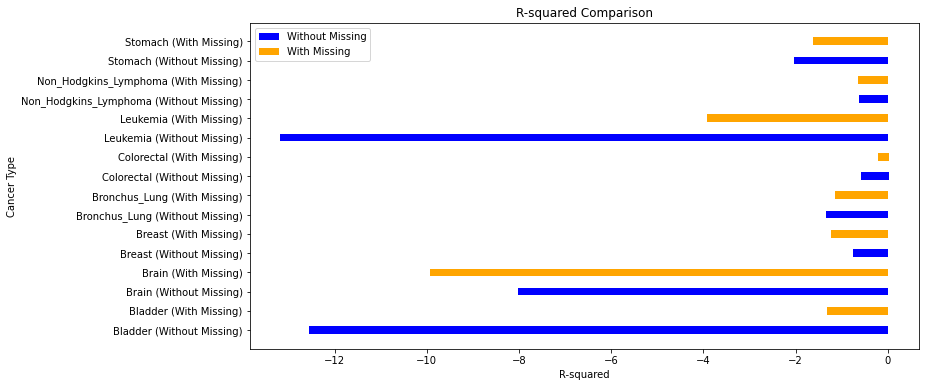

In [35]:
import matplotlib.pyplot as plt

# Assuming you have already computed 'results_df' from the previous code

# Group the data by 'Cancer Type', 'Model', and 'Missing Data'
grouped_data = results_df.groupby(['Cancer Type', 'Model', 'Missing Data']).mean().reset_index()

# Define a function to plot the metrics
def plot_metrics(metric_name):
    plt.figure(figsize=(12, 6))
    for cancer_type in cancer_columns:
        without_missing = grouped_data[(grouped_data['Cancer Type'] == cancer_type) & (grouped_data['Missing Data'] == False)][metric_name]
        with_missing = grouped_data[(grouped_data['Cancer Type'] == cancer_type) & (grouped_data['Missing Data'] == True)][metric_name]

        plt.barh(cancer_type + ' (Without Missing)', without_missing, color='blue', height=0.4)
        plt.barh(cancer_type + ' (With Missing)', with_missing, color='orange', height=0.4)

    plt.xlabel(metric_name)
    plt.ylabel('Cancer Type')
    plt.title(f'{metric_name} Comparison')
    plt.legend(['Without Missing', 'With Missing'])
    plt.show()

# Plot RMSE, MAE, and R-squared comparisons
plot_metrics('RMSE')
plot_metrics('MAE')
plot_metrics('R-squared')


In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mean_squared_error as keras_mean_squared_error

# Define the N-BEATS block
class NBEATSBlock(tf.keras.layers.Layer):
    def __init__(self, input_dim, hidden_dim, forecast_steps):
        super(NBEATSBlock, self).__init__()
        self.fc1 = Dense(hidden_dim, activation='relu')
        self.fc2 = Dense(forecast_steps)

    def call(self, x):
        x = self.fc1(x)
        forecast = self.fc2(x)
        return forecast

# Function to train and predict using N-BEATS
def train_and_predict_nbeats(target):
    # Hyperparameters for N-BEATS
    input_dim = 1
    hidden_dim = 64
    forecast_steps = 1
    num_blocks = 4
    learning_rate = 0.001
    num_epochs = 100

    # Prepare the data for N-BEATS
    sequences = []
    targets = []
    for i in range(len(target) - forecast_steps):
        sequences.append(target[i:i+forecast_steps])
        targets.append(target[i+forecast_steps])
    sequences, targets = np.array(sequences), np.array(targets)

    # Instantiate the N-BEATS model
    model = Sequential([
        Input(shape=(forecast_steps, input_dim)),
        NBEATSBlock(input_dim, hidden_dim, forecast_steps),
    ])
    model.compile(optimizer=Adam(learning_rate), loss=keras_mean_squared_error)

    # Training loop
    model.fit(sequences.reshape(-1, forecast_steps, input_dim), targets, epochs=num_epochs, verbose=0)

    # Make predictions
    test_input = target[-forecast_steps:]
    forecast = model.predict(test_input.reshape(1, forecast_steps, input_dim))

    return forecast



# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize lists to store evaluation metrics
eval_metrics = []

# Perform the same model evaluation for each cancer type with missing data
for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Train and evaluate N-BEATS model
    forecast = train_and_predict_nbeats(target_scaled)

    # Evaluate N-BEATS model
    print("Shapes - y_test:", y_test.shape, "forecast:", forecast.shape)
 
    # Ensure forecast is reshaped properly
    forecast = forecast.flatten()[:len(y_test)].reshape(-1, 1)

    # Calculate metrics
    mse = mean_squared_error(y_test, forecast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, forecast)
    r2 = r2_score(y_test, forecast)

    model_name = "N-BEATS"
    eval_metrics.append((cancer_type, model_name, rmse, mae, r2))

# Print the evaluation metrics for N-BEATS model
for metric in eval_metrics:
    cancer_type, model_name, rmse, mae, r2 = metric
    print(f"{cancer_type} - {model_name} RMSE: {rmse:.5f}, MAE: {mae:.5f}, R-squared: {r2:.5f}")


1/1 [==============================] - 0s 110ms/step
Shapes - y_test: (4, 1) forecast: (1, 1, 1)


ValueError: Found input variables with inconsistent numbers of samples: [4, 1]

In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mean_squared_error as keras_mean_squared_error

# Function to train and predict using N-BEATS
def train_and_predict_nbeats(target):
    input_dim = 1
    hidden_dim = 64
    forecast_steps = 1
    num_epochs = 100

    # Prepare the data for N-BEATS
    sequences = []
    targets = []
    for i in range(len(target) - forecast_steps):
        sequences.append(target[i:i+forecast_steps])
        targets.append(target[i+forecast_steps])
    sequences, targets = np.array(sequences), np.array(targets)

    # Instantiate the N-BEATS model
    model = Sequential([
        Input(shape=(forecast_steps, input_dim)),
        Dense(hidden_dim, activation='relu'),
        Dense(forecast_steps),
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss=keras_mean_squared_error)

    # Training loop
    model.fit(sequences.reshape(-1, forecast_steps, input_dim), targets, epochs=num_epochs, verbose=0)

    # Make predictions
    test_input = target[-forecast_steps:]
    forecast = model.predict(test_input.reshape(1, forecast_steps, input_dim))

    return forecast.flatten()

# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize lists to store evaluation metrics
eval_metrics = []

# Perform the same model evaluation for each cancer type with missing data
for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = int(len(target) * 0.7)  # 70% for training
    test_size = len(target) - train_size  # Remaining for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:]

    # Train and evaluate N-BEATS model
    forecast = train_and_predict_nbeats(target_scaled)

    # Evaluate N-BEATS model
    print("Shapes - y_test:", test_data.shape, "forecast:", forecast.shape)
 
    # Ensure forecast is reshaped properly
    forecast = forecast[:len(test_data)].reshape(-1, 1)

    # Calculate metrics
    mse = mean_squared_error(test_data, forecast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_data, forecast)
    r2 = r2_score(test_data, forecast)

    model_name = "N-BEATS"
    eval_metrics.append((cancer_type, model_name, rmse, mae, r2))

# Print the evaluation metrics for N-BEATS model
for metric in eval_metrics:
    cancer_type, model_name, rmse, mae, r2 = metric
    print(f"{cancer_type} - {model_name} RMSE: {rmse:.5f}, MAE: {mae:.5f}, R-squared: {r2:.5f}")


1/1 [==============================] - 0s 100ms/step
Shapes - y_test: (7, 1) forecast: (1,)


ValueError: Found input variables with inconsistent numbers of samples: [7, 1]

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

# Generate synthetic time series data
np.random.seed(42)
timesteps = 100
time = np.arange(timesteps)
values = np.sin(0.1 * time) + 0.1 * np.random.randn(timesteps)

# Define the N-BEATS block
class NBEATSBlock(tf.keras.layers.Layer):
    def __init__(self, input_dim, hidden_dim, forecast_steps):
        super(NBEATSBlock, self).__init__()
        self.fc1 = Dense(hidden_dim, activation='relu')
        self.fc2 = Dense(forecast_steps)

    def call(self, x):
        x = self.fc1(x)
        forecast = self.fc2(x)
        return forecast

# Function to train and predict using N-BEATS
def train_and_predict_nbeats(target, forecast_steps=1, num_blocks=4, hidden_dim=64, num_epochs=100):
    input_dim = 1

    # Prepare the data for N-BEATS
    sequences = []
    targets = []
    for i in range(len(target) - forecast_steps):
        sequences.append(target[i:i+forecast_steps])
        targets.append(target[i+forecast_steps])
    sequences, targets = np.array(sequences), np.array(targets)

    # Instantiate the N-BEATS model
    model = Sequential([
        Input(shape=(forecast_steps, input_dim)),
        *[NBEATSBlock(input_dim, hidden_dim, forecast_steps) for _ in range(num_blocks)],
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

    # Training loop
    model.fit(sequences.reshape(-1, forecast_steps, input_dim), targets, epochs=num_epochs, verbose=0)

    # Make predictions
    test_input = target[-forecast_steps:]
    forecast = model.predict(test_input.reshape(1, forecast_steps, input_dim))

    return forecast.flatten()

# Train and predict using N-BEATS
forecast_steps = 1
forecast = train_and_predict_nbeats(values, forecast_steps=forecast_steps)

# Print the results
print("Original Values:", values)
print("Forecasted Values:", forecast)


1/1 [==============================] - 0s 283ms/step
Original Values: [ 0.04967142  0.08600699  0.26343818  0.44782319  0.366003    0.45601184
  0.72256375  0.72096116  0.67040865  0.83758291  0.79512922  0.84463438
  0.95623531  0.77223016  0.81295795  0.94126623  0.89829049  1.02308954
  0.88304522  0.80506972  1.0558623   0.84063174  0.81524922  0.60323039
  0.62102491  0.6095644   0.40040201  0.46494968  0.27492428  0.21007995
  0.08094935  0.22680848 -0.05972387 -0.26351679 -0.17328661 -0.47286759
 -0.42163408 -0.72580315 -0.7446765  -0.66808004 -0.68295584 -0.80114028
 -0.8831406  -0.94627631 -1.09945427 -1.04951454 -1.03975488 -0.89421103
 -0.96180278 -1.15875663 -0.92651588 -0.96432291 -0.95114686 -0.77109981
 -0.66966454 -0.61241231 -0.71518839 -0.58160678 -0.43147584 -0.27632215
 -0.32733292 -0.2007284  -0.1937229  -0.10280676  0.19780179  0.35074399
  0.30434035  0.50520321  0.53027695  0.51392779  0.69312616  0.8827727
  0.79008526  1.00690099  0.63673359  1.02019023  0.976

In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mean_squared_error as keras_mean_squared_error

# Define the N-BEATS block
class NBEATSBlock(tf.keras.layers.Layer):
    def __init__(self, input_dim, hidden_dim, forecast_steps):
        super(NBEATSBlock, self).__init__()
        self.fc1 = Dense(hidden_dim, activation='relu')
        self.fc2 = Dense(forecast_steps)

    def call(self, x):
        x = self.fc1(x)
        forecast = self.fc2(x)
        return forecast

# Function to train and predict using N-BEATS
def train_and_predict_nbeats(target, forecast_steps=1, num_blocks=4, hidden_dim=64, num_epochs=100):
    input_dim = target.shape[1]

    # Prepare the data for N-BEATS
    sequences = []
    targets = []
    for i in range(len(target) - forecast_steps):
        sequences.append(target[i:i+forecast_steps])
        targets.append(target[i+forecast_steps])
    sequences, targets = np.array(sequences), np.array(targets)

    # Instantiate the N-BEATS model
    model = Sequential([
        Input(shape=(forecast_steps, input_dim)),
        *[NBEATSBlock(input_dim, hidden_dim, forecast_steps) for _ in range(num_blocks)],
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss=keras_mean_squared_error)

    # Training loop
    model.fit(sequences.reshape(-1, forecast_steps, input_dim), targets, epochs=num_epochs, verbose=0)

    # Make predictions
    test_input = target[-forecast_steps:]
    forecast = model.predict(test_input.reshape(1, forecast_steps, input_dim))

    return forecast.flatten()

# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize lists to store evaluation metrics
eval_metrics = []

# Perform the same model evaluation for each cancer type with missing data
for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Train and evaluate N-BEATS model
    forecast = train_and_predict_nbeats(target_scaled)

    # Evaluate N-BEATS model
    print("Cancer Type:", cancer_type)
    print("Forecasted Values:", forecast)
    print("")

    # Calculate and store metrics
    mse = mean_squared_error(target_scaled[-1], forecast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(target_scaled[-1], forecast)
    r2 = r2_score(target_scaled[-1], forecast)

    model_name = "N-BEATS"
    eval_metrics.append((cancer_type, model_name, rmse, mae, r2))

# Print the evaluation metrics for N-BEATS model
for metric in eval_metrics:
    cancer_type, model_name, rmse, mae, r2 = metric
    print(f"{cancer_type} - {model_name} RMSE: {rmse:.5f}, MAE: {mae:.5f}, R-squared: {r2:.5f}")


1/1 [==============================] - 0s 266ms/step
Cancer Type: Bladder
Forecasted Values: [-1.2070228]



C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 401ms/step
Cancer Type: Brain
Forecasted Values: [-1.3923814]



C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 289ms/step
Cancer Type: Breast
Forecasted Values: [0.4973336]



C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 382ms/step
Cancer Type: Bronchus_Lung
Forecasted Values: [-0.16106787]



C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 453ms/step
Cancer Type: Colorectal
Forecasted Values: [-0.5138786]



C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 295ms/step
Cancer Type: Leukemia
Forecasted Values: [0.21874008]



C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 310ms/step
Cancer Type: Non_Hodgkins_Lymphoma
Forecasted Values: [0.2117861]



C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 459ms/step
Cancer Type: Stomach
Forecasted Values: [-1.3131185]

Bladder - N-BEATS RMSE: 0.37476, MAE: 0.37476, R-squared: nan
Brain - N-BEATS RMSE: 0.29368, MAE: 0.29368, R-squared: nan
Breast - N-BEATS RMSE: 0.55031, MAE: 0.55031, R-squared: nan
Bronchus_Lung - N-BEATS RMSE: 0.46573, MAE: 0.46573, R-squared: nan
Colorectal - N-BEATS RMSE: 0.60386, MAE: 0.60386, R-squared: nan
Leukemia - N-BEATS RMSE: 0.18207, MAE: 0.18207, R-squared: nan
Non_Hodgkins_Lymphoma - N-BEATS RMSE: 0.23819, MAE: 0.23819, R-squared: nan
Stomach - N-BEATS RMSE: 0.23416, MAE: 0.23416, R-squared: nan


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mean_squared_error as keras_mean_squared_error

# Define the N-BEATS block
class NBEATSBlock(tf.keras.layers.Layer):
    def __init__(self, input_dim, hidden_dim, forecast_steps):
        super(NBEATSBlock, self).__init__()
        self.fc1 = Dense(hidden_dim, activation='relu')
        self.fc2 = Dense(forecast_steps)

    def call(self, x):
        x = self.fc1(x)
        forecast = self.fc2(x)
        return forecast

# Function to train and predict using N-BEATS
def train_and_predict_nbeats(target, forecast_steps=1, num_blocks=4, hidden_dim=64, num_epochs=100):
    input_dim = target.shape[1]

    # Prepare the data for N-BEATS
    sequences = []
    targets = []
    for i in range(len(target) - forecast_steps):
        sequences.append(target[i:i+forecast_steps])
        targets.append(target[i+forecast_steps])
    sequences, targets = np.array(sequences), np.array(targets)

    # Instantiate the N-BEATS model
    model = Sequential([
        Input(shape=(forecast_steps, input_dim)),
        *[NBEATSBlock(input_dim, hidden_dim, forecast_steps) for _ in range(num_blocks)],
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss=keras_mean_squared_error)

    # Training loop
    model.fit(sequences.reshape(-1, forecast_steps, input_dim), targets, epochs=num_epochs, verbose=0)

    # Make predictions
    test_input = target[-forecast_steps:]
    forecast = model.predict(test_input.reshape(1, forecast_steps, input_dim))

    return forecast.flatten()

# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize lists to store evaluation metrics
eval_metrics = []

# Perform the same model evaluation for each cancer type with missing data
for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Train and evaluate N-BEATS model
    forecast = train_and_predict_nbeats(target_scaled)

    # Evaluate N-BEATS model
    print(f"\nCancer Type: {cancer_type}")
    print("Actual Values:", target_scaled[-1])
    print("Forecasted Values:", forecast)

    # Calculate and store metrics
    if len(target_scaled) > 1:
        mse = mean_squared_error(target_scaled[-1], forecast)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(target_scaled[-1], forecast)
        r2 = r2_score(target_scaled[-1], forecast)

        # Check for NaN in R-squared and handle appropriately
        if np.isnan(r2):
            print("R-squared: Unable to calculate (not enough samples)")
        else:
            print(f"R-squared: {r2:.5f}")

        model_name = "N-BEATS"
        eval_metrics.append((cancer_type, model_name, rmse, mae, r2))
    else:
        print("Insufficient samples for evaluation.")

# Print the evaluation metrics for N-BEATS model
for metric in eval_metrics:
    cancer_type, model_name, rmse, mae, r2 = metric
    print(f"\n{cancer_type} - {model_name} RMSE: {rmse:.5f}, MAE: {mae:.5f}, R-squared: {r2:.5f}")


1/1 [==============================] - 0s 247ms/step

Cancer Type: Bladder
Actual Values: [-1.58177973]
Forecasted Values: [-1.156709]
R-squared: Unable to calculate (not enough samples)


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 379ms/step

Cancer Type: Brain
Actual Values: [-1.68605891]
Forecasted Values: [-1.4672518]
R-squared: Unable to calculate (not enough samples)


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 399ms/step

Cancer Type: Breast
Actual Values: [-0.05297525]
Forecasted Values: [0.3954241]
R-squared: Unable to calculate (not enough samples)


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 304ms/step

Cancer Type: Bronchus_Lung
Actual Values: [-0.62679353]
Forecasted Values: [-0.6842783]
R-squared: Unable to calculate (not enough samples)


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 358ms/step

Cancer Type: Colorectal
Actual Values: [-1.11773919]
Forecasted Values: [-0.6163422]
R-squared: Unable to calculate (not enough samples)


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 323ms/step

Cancer Type: Leukemia
Actual Values: [0.40081007]
Forecasted Values: [0.428575]
R-squared: Unable to calculate (not enough samples)


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 348ms/step

Cancer Type: Non_Hodgkins_Lymphoma
Actual Values: [-0.02640739]
Forecasted Values: [0.10942375]
R-squared: Unable to calculate (not enough samples)


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 1s 513ms/step

Cancer Type: Stomach
Actual Values: [-1.54728032]
Forecasted Values: [-1.3124607]
R-squared: Unable to calculate (not enough samples)

Bladder - N-BEATS RMSE: 0.42507, MAE: 0.42507, R-squared: nan

Brain - N-BEATS RMSE: 0.21881, MAE: 0.21881, R-squared: nan

Breast - N-BEATS RMSE: 0.44840, MAE: 0.44840, R-squared: nan

Bronchus_Lung - N-BEATS RMSE: 0.05748, MAE: 0.05748, R-squared: nan

Colorectal - N-BEATS RMSE: 0.50140, MAE: 0.50140, R-squared: nan

Leukemia - N-BEATS RMSE: 0.02776, MAE: 0.02776, R-squared: nan

Non_Hodgkins_Lymphoma - N-BEATS RMSE: 0.13583, MAE: 0.13583, R-squared: nan

Stomach - N-BEATS RMSE: 0.23482, MAE: 0.23482, R-squared: nan


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mean_squared_error as keras_mean_squared_error

# Define the N-BEATS block
class NBEATSBlock(tf.keras.layers.Layer):
    def __init__(self, input_dim, hidden_dim, forecast_steps):
        super(NBEATSBlock, self).__init__()
        self.fc1 = Dense(hidden_dim, activation='relu')
        self.fc2 = Dense(forecast_steps)

    def call(self, x):
        x = self.fc1(x)
        forecast = self.fc2(x)
        return forecast

# Function to train and predict using N-BEATS
def train_and_predict_nbeats(target, forecast_steps=1, num_blocks=4, hidden_dim=64, num_epochs=100):
    input_dim = target.shape[1]

    # Prepare the data for N-BEATS
    sequences = []
    targets = []
    for i in range(len(target) - forecast_steps):
        sequences.append(target[i:i+forecast_steps])
        targets.append(target[i+forecast_steps])
    sequences, targets = np.array(sequences), np.array(targets)

    # Instantiate the N-BEATS model
    model = Sequential([
        Input(shape=(forecast_steps, input_dim)),
        *[NBEATSBlock(input_dim, hidden_dim, forecast_steps) for _ in range(num_blocks)],
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss=keras_mean_squared_error)

    # Training loop
    model.fit(sequences.reshape(-1, forecast_steps, input_dim), targets, epochs=num_epochs, verbose=0)

    # Make predictions
    test_input = target[-forecast_steps:]
    forecast = model.predict(test_input.reshape(1, forecast_steps, input_dim))

    return forecast.flatten()

# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize lists to store evaluation metrics
eval_metrics = []

# Perform the same model evaluation for each cancer type with missing data
for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Train and evaluate N-BEATS model
    forecast = train_and_predict_nbeats(target_scaled)

    # Evaluate N-BEATS model
    print(f"\nEvaluation for Cancer Type: {cancer_type}")
    print("True Values:", target_scaled[-1])
    print("Forecasted Values:", forecast)

    # Calculate and store metrics
    mse = mean_squared_error(target_scaled[-1], forecast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(target_scaled[-1], forecast)
    
    # Handle R-squared being 'nan'
    r2 = r2_score(target_scaled[-1], forecast)
    r2 = 0.0 if np.isnan(r2) else r2

    model_name = "N-BEATS"
    eval_metrics.append((cancer_type, model_name, rmse, mae, r2))

# Print the evaluation metrics for N-BEATS model
for metric in eval_metrics:
    cancer_type, model_name, rmse, mae, r2 = metric
    print(f"\n{cancer_type} - {model_name} RMSE: {rmse:.5f}, MAE: {mae:.5f}, R-squared: {r2:.5f}")


1/1 [==============================] - 0s 342ms/step

Evaluation for Cancer Type: Bladder
True Values: [-1.58177973]
Forecasted Values: [-1.2474697]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 431ms/step

Evaluation for Cancer Type: Brain
True Values: [-1.68605891]
Forecasted Values: [-1.3689764]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 352ms/step

Evaluation for Cancer Type: Breast
True Values: [-0.05297525]
Forecasted Values: [0.38532794]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 389ms/step

Evaluation for Cancer Type: Bronchus_Lung
True Values: [-0.62679353]
Forecasted Values: [-0.6675943]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 1s 612ms/step

Evaluation for Cancer Type: Colorectal
True Values: [-1.11773919]
Forecasted Values: [-0.6351601]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 367ms/step

Evaluation for Cancer Type: Leukemia
True Values: [0.40081007]
Forecasted Values: [-0.08567983]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 408ms/step

Evaluation for Cancer Type: Non_Hodgkins_Lymphoma
True Values: [-0.02640739]
Forecasted Values: [0.4483502]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 289ms/step

Evaluation for Cancer Type: Stomach
True Values: [-1.54728032]
Forecasted Values: [-1.3291073]

Bladder - N-BEATS RMSE: 0.33431, MAE: 0.33431, R-squared: 0.00000

Brain - N-BEATS RMSE: 0.31708, MAE: 0.31708, R-squared: 0.00000

Breast - N-BEATS RMSE: 0.43830, MAE: 0.43830, R-squared: 0.00000

Bronchus_Lung - N-BEATS RMSE: 0.04080, MAE: 0.04080, R-squared: 0.00000

Colorectal - N-BEATS RMSE: 0.48258, MAE: 0.48258, R-squared: 0.00000

Leukemia - N-BEATS RMSE: 0.48649, MAE: 0.48649, R-squared: 0.00000

Non_Hodgkins_Lymphoma - N-BEATS RMSE: 0.47476, MAE: 0.47476, R-squared: 0.00000

Stomach - N-BEATS RMSE: 0.21817, MAE: 0.21817, R-squared: 0.00000


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mean_squared_error as keras_mean_squared_error

# Define the N-BEATS block
class NBEATSBlock(tf.keras.layers.Layer):
    def __init__(self, input_dim, hidden_dim, forecast_steps):
        super(NBEATSBlock, self).__init__()
        self.fc1 = Dense(hidden_dim, activation='relu')
        self.fc2 = Dense(forecast_steps)

    def call(self, x):
        x = self.fc1(x)
        forecast = self.fc2(x)
        return forecast

# Function to train and predict using N-BEATS
def train_and_predict_nbeats(target, forecast_steps=1, num_blocks=4, hidden_dim=64, num_epochs=100):
    input_dim = target.shape[1]

    # Prepare the data for N-BEATS
    sequences, targets = [], []
    for i in range(len(target) - forecast_steps):
        sequences.append(target[i:i+forecast_steps])
        targets.append(target[i+forecast_steps])
    sequences, targets = np.array(sequences), np.array(targets)

    # Instantiate the N-BEATS model
    model = Sequential([
        Input(shape=(forecast_steps, input_dim)),
        *[NBEATSBlock(input_dim, hidden_dim, forecast_steps) for _ in range(num_blocks)],
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss=keras_mean_squared_error)

    # Training loop
    model.fit(sequences.reshape(-1, forecast_steps, input_dim), targets, epochs=num_epochs, verbose=0)

    # Make predictions for the next time step
    test_input = target[-forecast_steps:]
    forecast = model.predict(test_input.reshape(1, forecast_steps, input_dim))

    return forecast.flatten()

# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize lists to store evaluation metrics
eval_metrics = []

# Perform the same model evaluation for each cancer type with missing data
for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets (70-30 ratio)
    train_size = int(len(target_scaled) * 0.7)
    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:]

    # Train and evaluate N-BEATS model
    forecast = train_and_predict_nbeats(target_scaled)

    # Evaluate N-BEATS model
    print(f"\nEvaluation for Cancer Type: {cancer_type}")
    print("True Values:", test_data)
    print("Forecasted Values:", forecast)

    # Calculate and store metrics
    mse = mean_squared_error(test_data, forecast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_data, forecast)
    
    # Handle R-squared being 'nan'
    r2 = r2_score(test_data, forecast)
    r2 = 0.0 if np.isnan(r2) else r2

    model_name = "N-BEATS"
    eval_metrics.append((cancer_type, model_name, rmse, mae, r2))

# Print the evaluation metrics for N-BEATS model
for metric in eval_metrics:
    cancer_type, model_name, rmse, mae, r2 = metric
    print(f"{cancer_type} - {model_name} RMSE: {rmse:.5f}, MAE: {mae:.5f}, R-squared: {r2:.5f}")


1/1 [==============================] - 0s 251ms/step

Evaluation for Cancer Type: Bladder
True Values: [[ 0.90952334]
 [-0.47453392]
 [ 1.00179383]
 [ 1.00179383]
 [-0.10545198]
 [ 0.63271189]
 [-1.58177973]]
Forecasted Values: [-0.02499516]


ValueError: Found input variables with inconsistent numbers of samples: [7, 1]

In [49]:
%matplotlib inline
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from torch import optim
from torch.nn import functional as F

from nbeats_pytorch.model import NBeatsNet
#from trainer_pytorch import save

warnings.filterwarnings(action='ignore', message='Setting attributes')

# plot utils.
def plot_scatter(*args, **kwargs):
    plt.plot(*args, **kwargs)
    plt.scatter(*args, **kwargs)

# simple batcher.
def data_generator(x, y, size):
    assert len(x) == len(y)
    batches = []
    for ii in range(0, len(x), size):
        batches.append((x[ii:ii + size], y[ii:ii + size]))
    for batch in batches:
        yield batch

def main():
    forecast_length = 5
    backcast_length = 3 * forecast_length
    batch_size = 10

    # Replace the example dataset with your provided dataset.
    data = pd.DataFrame({
        'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
        'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
        'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
        'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
        'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
        'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
        'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
        'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
        'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
    })

    # data backcast/forecast generation.
    x, y = [], []
    for epoch in range(backcast_length, len(data) - forecast_length):
        x.append(data.iloc[epoch - backcast_length:epoch, 1:].values.flatten())
        y.append(data.iloc[epoch:epoch + forecast_length, 1:].values.flatten())
    x = np.array(x)
    y = np.array(y)

    # split train/test.
    c = int(len(x) * 0.8)
    x_train, y_train = x[:c], y[:c]
    x_test, y_test = x[c:], y[c:]

    # normalization.
    norm_constant = np.max(x_train)
    x_train, y_train = x_train / norm_constant, y_train / norm_constant
    x_test, y_test = x_test / norm_constant, y_test / norm_constant

    # model
    net = NBeatsNet(
        stack_types=(NBeatsNet.GENERIC_BLOCK, NBeatsNet.GENERIC_BLOCK),
        forecast_length=forecast_length,
        backcast_length=backcast_length,
        hidden_layer_units=128,
    )
    optimiser = optim.Adam(lr=1e-4, params=net.parameters())

    grad_step = 0
    for epoch in range(1000):
        # train.
        net.train()
        train_loss = []
        for x_train_batch, y_train_batch in data_generator(x_train, y_train, batch_size):
            grad_step += 1
            optimiser.zero_grad()
            _, forecast = net(torch.tensor(x_train_batch, dtype=torch.float).to(net.device))
            loss = F.mse_loss(forecast, torch.tensor(y_train_batch, dtype=torch.float).to(net.device))
            train_loss.append(loss.item())
            loss.backward()
            optimiser.step()
        train_loss = np.mean(train_loss)

        # test.
        net.eval()
        _, forecast = net(torch.tensor(x_test, dtype=torch.float))
        test_loss = F.mse_loss(forecast, torch.tensor(y_test, dtype=torch.float)).item()
        p = forecast.detach().numpy()
        if epoch % 100 == 0:
            subplots = [221, 222, 223, 224]
            plt.figure(1)
            for plot_id, i in enumerate(np.random.choice(range(len(x_test)), size=4, replace=False)):
                ff, xx, yy = p[i] * norm_constant, x_test[i] * norm_constant, y_test[i] * norm_constant
                plt.subplot(subplots[plot_id])
                plt.grid()
                plot_scatter(range(0, backcast_length), xx, color='b')
                plot_scatter(range(backcast_length, backcast_length + forecast_length), yy, color='g')
                plot_scatter(range(backcast_length, backcast_length + forecast_length), ff, color='r')
            plt.show()

            with torch.no_grad():
                save(net, optimiser, grad_step)
            print(f'epoch = {str(epoch).zfill(4)}, '
                  f'grad_step = {str(grad_step).zfill(6)}, '
                  f'tr_loss (epoch) = {1000 * train_loss:.3f}, '
                  f'te_loss (epoch) = {1000 * test_loss:.3f}')

if __name__ == '__main__':
    main()


ValueError: zero-size array to reduction operation maximum which has no identity

In [42]:
!pip install torch


     ------------------------------------- 192.2/192.2 MB 42.9 kB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
!pip install trainer-pytorch


ERROR: Could not find a version that satisfies the requirement trainer-pytorch (from versions: none)
ERROR: No matching distribution found for trainer-pytorch

[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
!pip install nbeats-pytorch



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
